# **EEG Sleep Stage Classification: A Comparative Study of Time Series Modeling Approaches**

**TSAC Group Project – Notebook**  
**Due Date:** May 17, 2025 (by 5:00 PM)  

- **Team Leader:** Selma Khelili S1 G1
- **Team Members:**  
  - Safia Tifour S1 G1
  - Safia Bokreta S2 G7
  - Lina Yahyaoui S1 G4



## **Overview**

EEG (**Electroencephalography**) is a recording of brain signals that plays a critical role in sleep studies, where distinct brainwave patterns correspond to different stages of the sleep cycle. However, classifying EEG signals into sleep stages poses considerable challenges due to their **high dimensionality**, **temporal complexity**, and **variability across individuals and recording conditions**.

In this study, we focus on the classification of EEG signals into **five sleep stages**:

- **Wake**,  
- **Non-Rapid Eye Movement (NREM)** stages: **E1**, **E2**, and **E3**,  
- **Rapid Eye Movement (REM)**.

The dataset used includes **5,000 training samples** and **1,000 test samples**, distributed across the `Sleep Train 5000.csv` and `Sleep Test 1000.csv` files.

---

To effectively handle the structure and complexity of EEG data, we explore a range of modeling strategies, combining both **machine learning approaches** and **deep learning architectures**, each designed to capture different characteristics of the signal:

- **Classical ensemble models** with handcrafted features,  
- **Recurrent Neural Networks (RNNs)** — including **Long Short-Term Memory (LSTM)** networks — for modeling temporal sequences and long-range dependencies,  
- **Convolutional Neural Networks (CNNs)** for extracting hierarchical and localized signal patterns,  
- **MiniRocket**, a specialized time series transformation method for fast and scalable feature extraction.

---

Each method is evaluated based on its ability to capture:

- **Temporal dependencies**,  
- **Local and global signal structures**,  
- **Generalizability across unseen samples**.

Among all the approaches tested, the **ensemble models** using handcrafted features achieved the **highest classification accuracy**, highlighting their strength in capturing key EEG signal characteristics in an interpretable and structured way.

---

The following sections provide a detailed discussion of each method and the empirical results obtained.  
**Ultimately, the ensemble model was selected as the final approach for prediction due to its superior performance.** You can find the final predictions here : [Predictions](https://docs.google.com/spreadsheets/d/1TCfNxVkIxpw2hC-V0YreBUVIQNYJJn9PZ_XDEZEzzBs/edit?usp=sharing)


## **Data Exploration and Visualization**

A thorough exploratory data analysis was conducted to gain insights into the structure and characteristics of the EEG signals across the different sleep stages. This step was essential in shaping the feature engineering and modeling strategies. Key findings include:

- **Class Imbalance**  
  The dataset exhibited a notable imbalance in class distribution, with some sleep stages being underrepresented. This issue was addressed through appropriate sampling strategies to avoid biased model training.

- **Temporal Signal Similarity**  
  Time series visualizations revealed overlapping trends between certain classes, often with slight phase shifts.

#### Importing necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import umap.umap_ as umap
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import  RobustScaler
from sklearn.feature_selection import SelectKBest, f_classif

#### Loading the dataset

In [ ]:
df = pd.read_csv("Sleep Train 5000.csv", header=None)
df_numeric = df.select_dtypes(include=['number'])
df = df_numeric
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Columns: 179 entries, 0 to 178
dtypes: float64(178), int64(1)
memory usage: 6.8 MB


0            1            2            3            4    \
count  4999.000000  4999.000000  4999.000000  4999.000000  4999.000000   
mean      2.164633    -0.554607    -0.564193    -0.540193    -0.649433   
std       1.153444    17.789305    17.597088    17.681466    17.723401   
min       0.000000  -146.094760   -82.371185   -81.849570   -90.543100   
25%       2.000000    -9.345543    -9.258608    -9.519414    -9.693284   
50%       2.000000    -0.391209    -0.652015    -0.652015    -0.738950   
75%       3.000000     8.062149     8.041514     8.215385     8.215385   
max       4.000000   105.409035    95.585350    91.934070   109.668860   

               5            6            7            8            9    ...  \
count  4999.000000  4999.000000  4999.000000  4999.000000  4999.000000  ...   
mean     -0.753712    -1.075914    -1.181350    -1.451674    -1.382415  ...   
std      17.403211    17.384649    17.279831    17.366649    17.506116  ...   
min     -90.803910  -103.409520   -83.588280   -83.588280  -136.705730  ...   
25%      -9.432479    -9.693284   -10.127961   -10.562637   -10.301831  ...   
50%      -0.738950    -0.999756    -1.260562    -1.347497    -1.608303  ...   
75%       7.883883     7.780708     7.443468     7.172161     7.432967  ...   
max      87.065690    87.413430    77.850550   112.972404    86.283270  ...   

               169          170          171          172          173  \
count  4999.000000  4999.000000  4999.000000  4999.000000  4999.000000   
mean      1.190700     1.485347     1.662399     1.745655     1.896240   
std      17.849879    17.741248    17.593795    17.586370    17.837506   
min     -82.371185  -103.844200   -72.460560   -75.329430  -125.925766   
25%      -7.780708    -7.259097    -7.432967    -7.432967    -6.998291   
50%       0.867644     1.086691     1.347497     1.434432     1.521367   
75%       9.780220    10.301831    10.214896    10.301831    10.997314   
max      97.758730   102.714040    93.498900    90.108420    87.326490   

               174          175          176          177          178  
count  4999.000000  4999.000000  4999.000000  4999.000000  4999.000000  
mean      2.166390     2.260436     2.391720     2.331582     2.544677  
std      17.770479    17.780897    17.603510    17.718653    17.526130  
min     -81.501830   -82.197310   -82.197310  -116.362885   -89.934555  
25%      -6.911355    -6.814286    -6.824420    -6.780952    -6.389744  
50%       1.869109     2.042979     2.129914     2.042979     2.477656  
75%      10.823443    11.084250    11.301588    11.084250    11.258120  
max      97.063250    91.586330    90.282295    84.544560    84.805374  

[8 rows x 179 columns]

In [ ]:
df.head()

0          1          2          3         4          5          6    \
0    0  -1.608303 -13.170696  -8.997802  1.347497   5.259585  -1.521367   
1    0  -2.825397   2.390720   3.955555 -4.216361   2.477656   2.129914   
2    0 -15.952625  -3.347008 -15.517949 -9.432479 -16.474237  -6.650549   
3    0 -26.558731 -18.560684 -12.040537 -4.216361  -9.432479   1.260562   
4    0  -5.607326   6.042003  -4.129426 -5.172649  -7.172161 -11.953602   

         7          8          9    ...       169       170       171  \
0   2.651526   4.651038   3.781685  ... -8.041514 -6.563614 -4.998779   
1   3.955555  -5.172649   5.694261  ...  4.129426  7.085226 -2.390720   
2 -14.909402 -12.214408 -10.823443  ... -4.390232 -0.738950  4.477167   
3  -2.216850  -3.520879  -5.781197  ... -3.086203 -0.652015  3.607814   
4  -7.780708  -0.130403  -2.912332  ... -1.260562  1.608303  4.564103   

         172        173        174        175        176       177       178  
0  -5.346520  -6.389744 -11.171185  -2.390720   1.086691  6.911355  6.128938  
1  -2.303785  -3.694750   4.564103  -6.215873  -2.738462 -4.477167 -4.390232  
2  12.996825  21.951160  21.081806  21.603418  14.909402  9.345543  6.998291  
3  15.170208  16.039560   6.128938   3.955555  -1.956044 -2.390720 -4.651038  
4  -4.911844  10.301831  10.127961   8.389256  -2.216850 -4.390232  0.478144  

[5 rows x 179 columns]

The first column is our target column

Missing values

In [ ]:
df.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
174    0
175    0
176    0
177    0
178    0
Length: 179, dtype: int64

No missing values in the dataset

 #### Class Distribution Plot

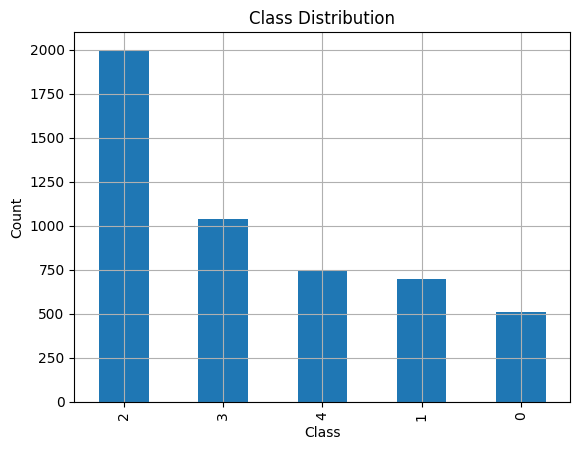

In [ ]:
df[0].value_counts().plot(kind='bar', title='Class Distribution')
plt.xlabel("Class")
plt.ylabel("Count")
plt.grid(True)
plt.show()

Stage 2 dominates with around 2,000 samples, which is roughly four times more than Stage 0, which has only about 500 samples. This imbalance could bias models toward predicting Stage 2 more often

#### Features Correlation and Importance

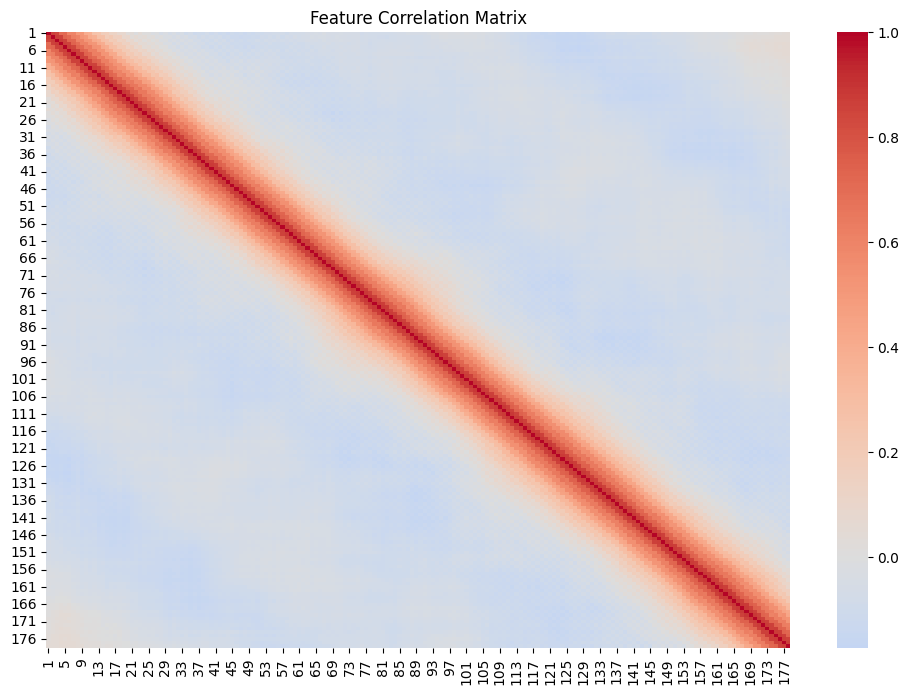

In [ ]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.iloc[:, 1:].corr(), cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

The thick red diagonal band suggests that features near each other are strongly correlated. Dimentionality reduction techniques should be used to retain the most important information while cutting redundancy

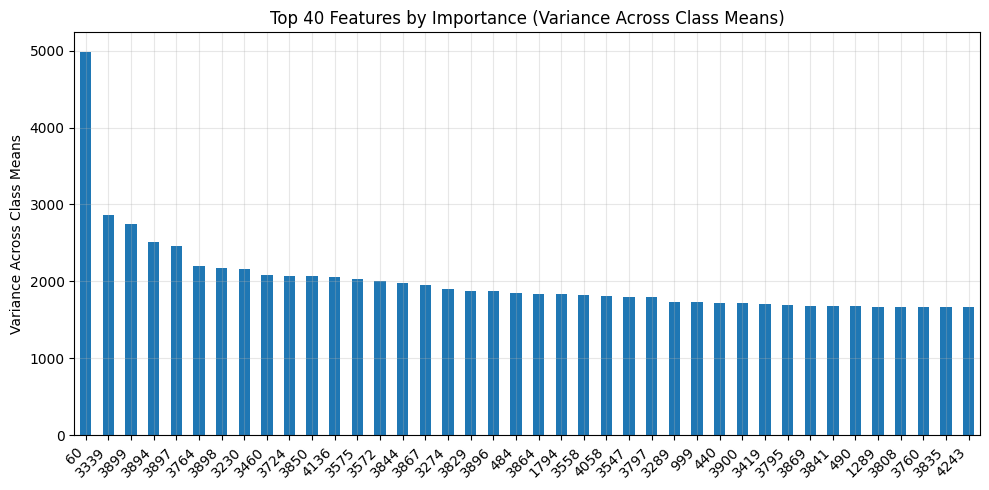

In [ ]:
feature_importance = df.var(axis=1).sort_values(ascending=False)

# Select top N features
top_n = 40
top_features = feature_importance.head(top_n)

# Plot
plt.figure(figsize=(10, 5))
top_features.plot(kind='bar')
plt.title(f'Top {top_n} Features by Importance (Variance Across Class Means)')
plt.ylabel('Variance Across Class Means')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


This plot helps in identifying the features with highest variance, these could help in distinguishing classes, and feature 60 is the most informative

#### Signals Comparison per Sleep Stage

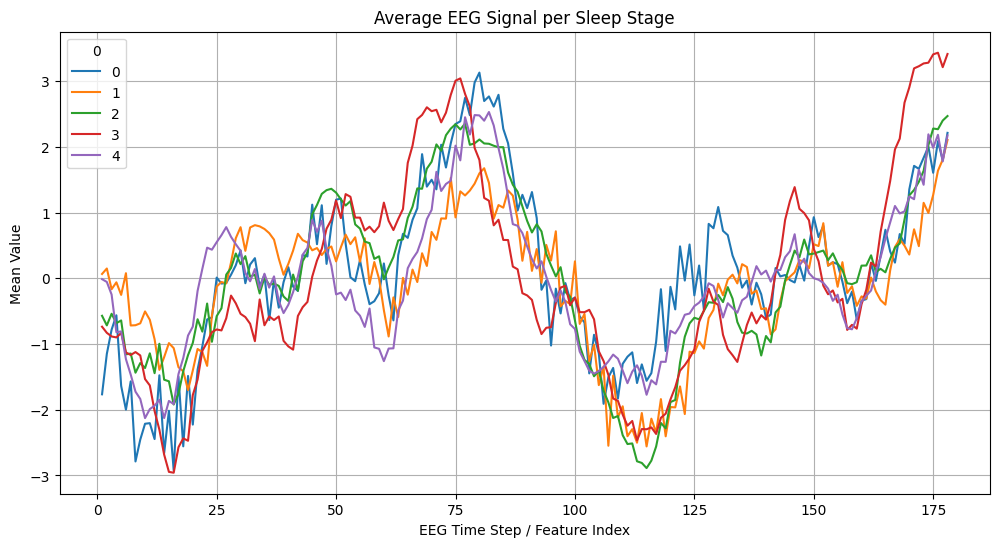

In [ ]:
mean_signals = df.groupby(0).mean().T

mean_signals.plot(figsize=(12, 6), legend=True)
plt.title("Average EEG Signal per Sleep Stage")
plt.xlabel("EEG Time Step / Feature Index")
plt.ylabel("Mean Value")
plt.grid(True)
plt.show()

Class patterns differ in magnitude, but appear to follow the same shape

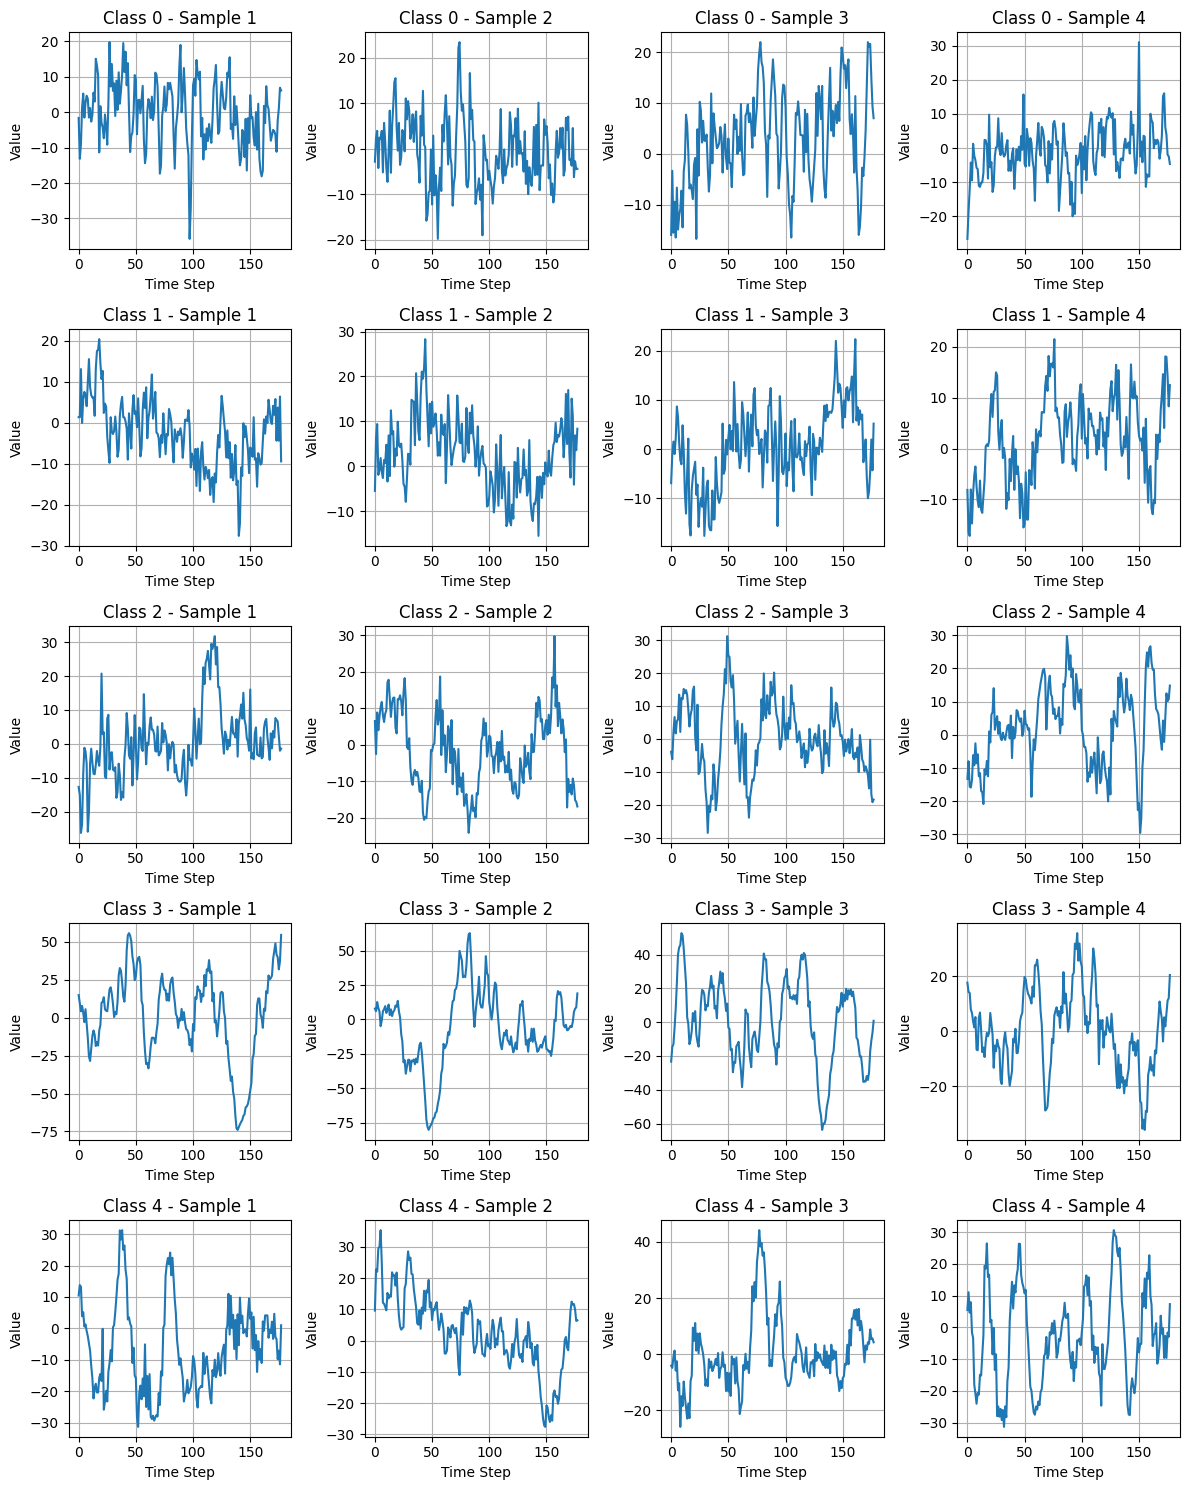

In [ ]:
# Cell 2: Plot instances of each class (4 samples per class)
unique_classes = df[0].unique()
num_classes = len(unique_classes)
samples_per_class = 4

plt.figure(figsize=(12, 3 * num_classes))
plot_index = 1
for cls in unique_classes:
    class_samples = df[df[0] == cls].head(samples_per_class)
    for i in range(samples_per_class):
        plt.subplot(num_classes, samples_per_class, plot_index)
        plt.plot(class_samples.iloc[i, 1:].values)
        plt.title(f"Class {cls} - Sample {i+1}")
        plt.xlabel("Time Step")
        plt.ylabel("Value")
        plt.grid(True)
        plot_index += 1

plt.tight_layout()
plt.show()

In some classes, the signals align closely in shape, while others show more variation, indicating possible intra-class variance.

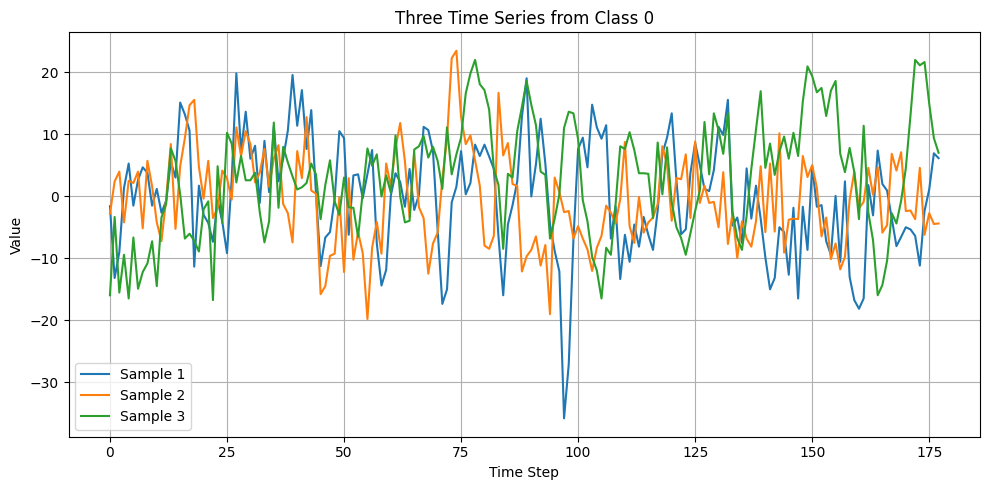

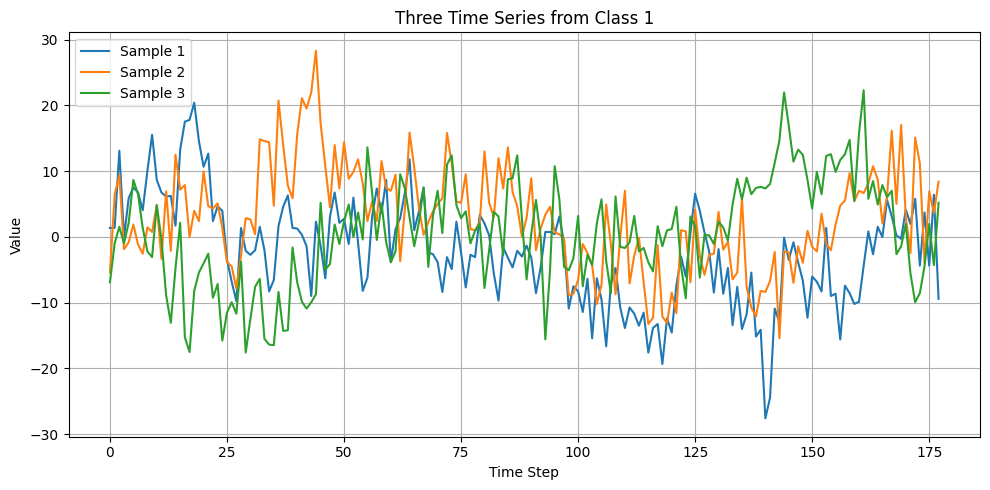

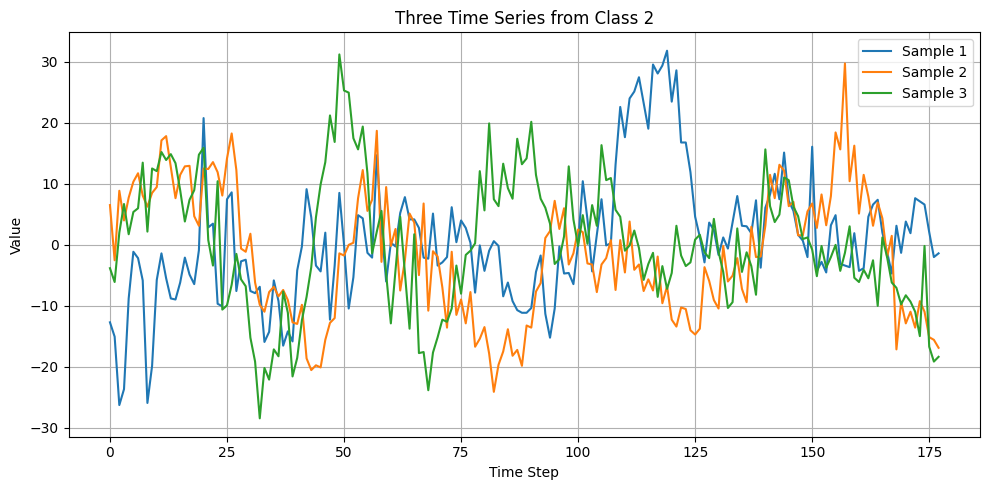

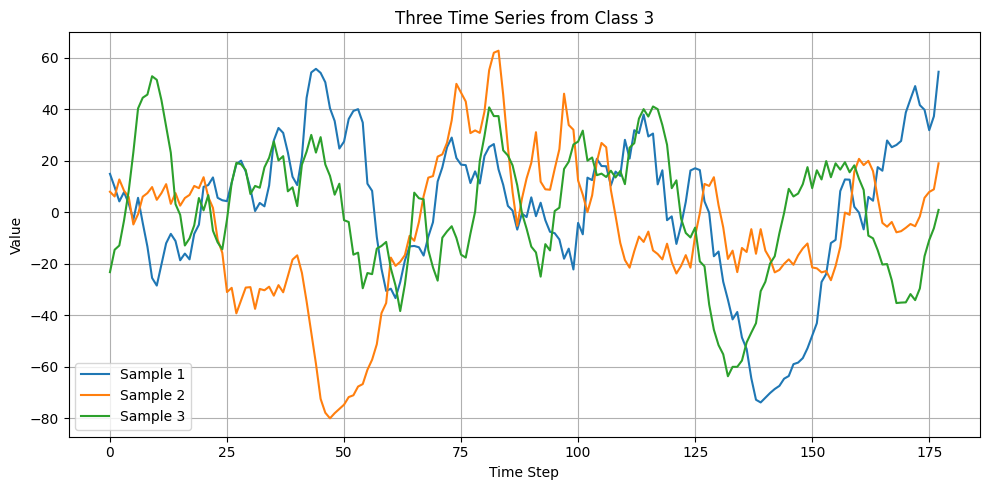

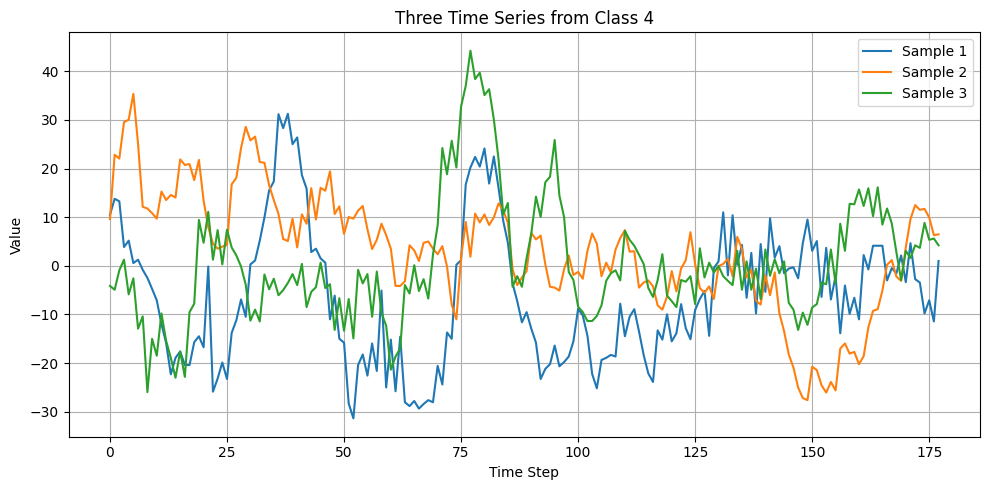

In [ ]:
# Cell 3: Plot 3 time series from the same class in the same plot
for target_class in unique_classes:
    samples = df[df[0] == target_class].head(3)

    plt.figure(figsize=(10, 5))
    for i in range(3):
        plt.plot(samples.iloc[i, 1:].values, label=f"Sample {i+1}")

    plt.title(f"Three Time Series from Class {target_class}")
    plt.xlabel("Time Step")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Many of the patterns look similar across classes, but they do not occur at the same time step — they are shifted forward or backward in time.

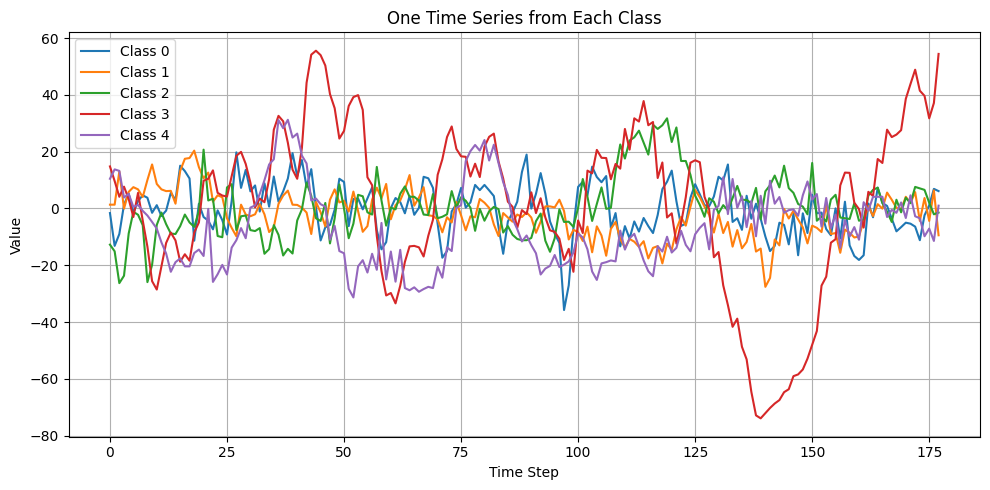

In [ ]:
# Cell 4: Plot one time series from each class using the first instance (or first row)
samples = df.groupby(0).head(1)

plt.figure(figsize=(10, 5))
for cls in unique_classes:
    series = samples[samples[0] == cls].iloc[0, 1:]
    plt.plot(series.values, label=f"Class {cls}")

plt.title("One Time Series from Each Class")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Classes show structurally similar patterns that appear at different time points, suggesting a form of phase shift or time warping.

### Dimensionality Reduction for Visual Patterns

We will  select the top 40 features using ANOVA F-score (SelectKBest), then apply Robust Scaling to reduce the impact of outliers. Then using UMAP we project the data into 3D space for class-wise visualization.

In [ ]:
X = df.drop(df.columns[0], axis=1)
y = df[df.columns[0]]

In [ ]:
def select_top_features(X, y, k=30):
    selector = SelectKBest(f_classif, k=k)
    X_selected = selector.fit_transform(X, y)

    # Get indices of selected features
    selected_indices = selector.get_support(indices=True)

    # Print feature importance scores
    scores = selector.scores_
    print("Top feature F-scores:")
    for idx, score in sorted(zip(selected_indices, scores[selected_indices]), key=lambda x: x[1], reverse=True):
        print(f"Feature {idx}: {score}")

    return X_selected

# Select top features
X_top = select_top_features(X, y, k=40)

# 2. ROBUST SCALING
# We use RobustScaler which is less sensitive to outliers
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_top)

# 3. UMAP PARAMETERS
def try_different_umap_params(X_scaled, y, n_neighbors_list=[10, 15, 30, 50], min_dist_list=[0.0, 0.1, 0.25, 0.5]):
    results = []

    for n_neighbors in n_neighbors_list:
        for min_dist in min_dist_list:
            print(f"Trying UMAP with n_neighbors={n_neighbors}, min_dist={min_dist}")
            reducer = umap.UMAP(
                n_components=3,
                n_neighbors=n_neighbors,
                min_dist=min_dist,
                metric='euclidean',
                random_state=42
            )
            X_umap = reducer.fit_transform(X_scaled)
            umap_df = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2', 'UMAP3'])
            umap_df['sleep_stage'] = y
            results.append({
                'n_neighbors': n_neighbors,
                'min_dist': min_dist,
                'reducer': reducer,
                'embedding': X_umap,
                'df': umap_df
            })

    return results


umap_results = try_different_umap_params(X_scaled, y)

# 4. VISUALIZATION

def plot_enhanced_umap(umap_df, title):
    color_map = {
        0: '#1f77b4',  # Deep blue
        1: '#ff7f0e',  # Orange
        2: '#2ca02c',  # Green
        3: '#d62728',  # Red
        4: '#9467bd',  # Purple
        5: '#8c564b',  # Brown
    }
    fig = px.scatter_3d(
        umap_df,
        x='UMAP1', y='UMAP2', z='UMAP3',
        color='sleep_stage',
        color_discrete_map=color_map,
        opacity=0.7,
        title=title
    )

    fig.update_layout(
        scene=dict(
            xaxis=dict(title='UMAP1'),
            yaxis=dict(title='UMAP2'),
            zaxis=dict(title='UMAP3'),
        ),
        margin=dict(l=0, r=0, b=0, t=40),
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=-0.1,
            xanchor="center",
            x=0.5
        )
    )

    return fig

for i, result in enumerate(umap_results):
    n_neighbors = result['n_neighbors']
    min_dist = result['min_dist']
    umap_df = result['df']

    title = f'3D UMAP (n_neighbors={n_neighbors}, min_dist={min_dist})'

    fig = plot_enhanced_umap(umap_df, title)
    fig.show()

# 5. ALTERNATIVE APPROACH - CLUSTER-THEN-UMAP
def cluster_then_umap(X_scaled, y):
    unique_classes = np.unique(y)
    combined_df = pd.DataFrame()

    for cls in unique_classes:
        mask = (y == cls)
        X_class = X_scaled[mask]

        # If we have enough samples for this class
        if X_class.shape[0] > 10:
            # UMAP for this class
            reducer = umap.UMAP(
                n_components=3,
                n_neighbors=min(15, X_class.shape[0]-1),
                min_dist=0.1,
                random_state=42
            )

            X_umap = reducer.fit_transform(X_class)

            # Create DataFrame for this class
            class_df = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2', 'UMAP3'])
            class_df['sleep_stage'] = cls
            # Combine
            combined_df = pd.concat([combined_df, class_df], ignore_index=True)

    return combined_df

# class-specific UMAP
class_specific_df = cluster_then_umap(X_scaled, y)
fig = plot_enhanced_umap(class_specific_df, 'Class-Specific 3D UMAP')
fig.show()

# 6. CONVEX HULLS (The tightest possible boundary around a group of points)
# We  add convex hulls around each class for better visualization
def plot_with_convex_hulls(umap_df):
    # Get unique classes
    unique_classes = umap_df['sleep_stage'].unique()

    # Create figure
    fig = go.Figure()

    # Color map for consistency
    color_map = {
        0: '#1f77b4',  # Deep blue
        1: '#ff7f0e',  # Orange
        2: '#2ca02c',  # Green
        3: '#d62728',  # Red
        4: '#9467bd',  # Purple
        5: '#8c564b',  # Brown
    }

    # Add traces for each class
    for cls in unique_classes:
        # Get data for this class
        class_data = umap_df[umap_df['sleep_stage'] == cls]

        # Add scatter trace
        fig.add_trace(go.Scatter3d(
            x=class_data['UMAP1'],
            y=class_data['UMAP2'],
            z=class_data['UMAP3'],
            mode='markers',
            marker=dict(
                size=4,
                color=color_map.get(cls, '#000000'),
                opacity=0.7
            ),
            name=f'Sleep Stage {cls}'
        ))

    # Update layout
    fig.update_layout(
        title='3D UMAP with Convex Hulls',
        scene=dict(
            xaxis=dict(title='UMAP1'),
            yaxis=dict(title='UMAP2'),
            zaxis=dict(title='UMAP3'),
        ),
        margin=dict(l=0, r=0, b=0, t=40)
    )

    return fig

# Create convex hull visualization
hull_fig = plot_with_convex_hulls(umap_results[0]['df'])
hull_fig.show()

Top feature F-scores:
Feature 171: 2.871353708526905
Feature 170: 2.7412491701891755
Feature 66: 2.5427674256869475
Feature 169: 2.4867785996331175
Feature 168: 2.3916435643816794
Feature 68: 2.2445290698720113
Feature 59: 2.164289512870182
Feature 172: 2.090221824597267
Feature 67: 2.0403310124974983
Feature 174: 1.8441211039616412
Feature 173: 1.8243957968984588
Feature 60: 1.7801681570361008
Feature 82: 1.7407880232691384
Feature 64: 1.64705327607752
Feature 65: 1.6094645995022974
Feature 117: 1.5522692652141004
Feature 14: 1.5423579220666603
Feature 15: 1.5164548967142926
Feature 167: 1.481902501088178
Feature 61: 1.4762996110154165
Feature 70: 1.473273536738176
Feature 166: 1.4444961253754685
Feature 74: 1.437121237142047
Feature 84: 1.431161905387314
Feature 119: 1.4308561882915423
Feature 69: 1.4295549028189423
Feature 83: 1.4082942979770918
Feature 49: 1.3627843596315632
Feature 92: 1.3544645299085811
Feature 121: 1.3503492532719206
Feature 58: 1.349899137979791
Feature 175: 1.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Trying UMAP with n_neighbors=10, min_dist=0.1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Trying UMAP with n_neighbors=10, min_dist=0.25


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Trying UMAP with n_neighbors=10, min_dist=0.5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Trying UMAP with n_neighbors=15, min_dist=0.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Trying UMAP with n_neighbors=15, min_dist=0.1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Trying UMAP with n_neighbors=15, min_dist=0.25


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Trying UMAP with n_neighbors=15, min_dist=0.5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Trying UMAP with n_neighbors=30, min_dist=0.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Trying UMAP with n_neighbors=30, min_dist=0.1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Trying UMAP with n_neighbors=30, min_dist=0.25


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Trying UMAP with n_neighbors=30, min_dist=0.5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Trying UMAP with n_neighbors=50, min_dist=0.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Trying UMAP with n_neighbors=50, min_dist=0.1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Trying UMAP with n_neighbors=50, min_dist=0.25


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Trying UMAP with n_neighbors=50, min_dist=0.5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no see

- Some clusters are closer together in UMAP space, suggesting that some sleep stages are more similar while others are farther apart.
- There are some overlaps between adjacent sleep stages (Convex Hulls Umap), which could indicate that their classes are harder to classify.

### Boxplot per Feature and Sleep Stage

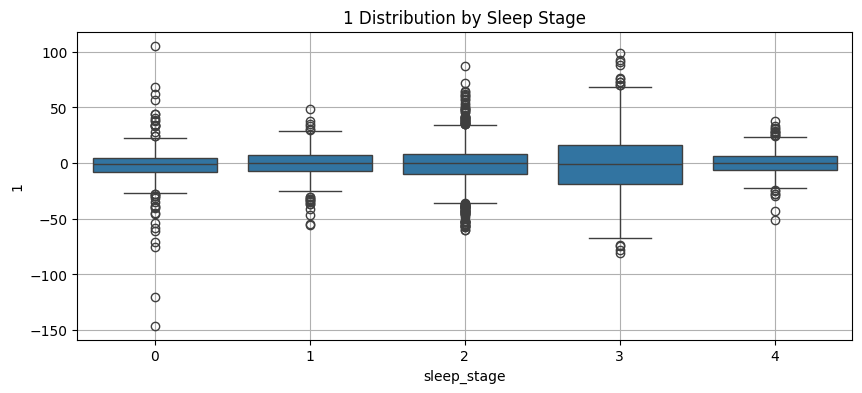

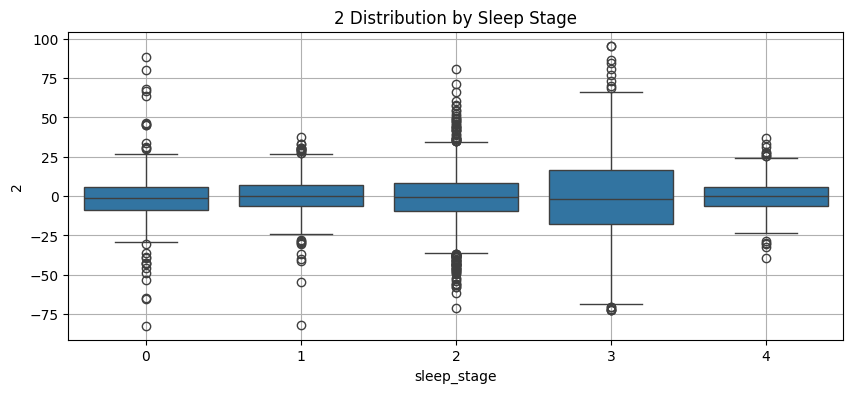

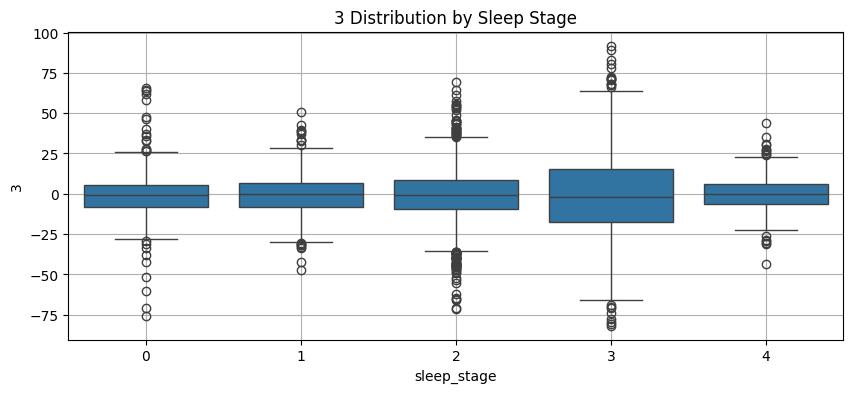

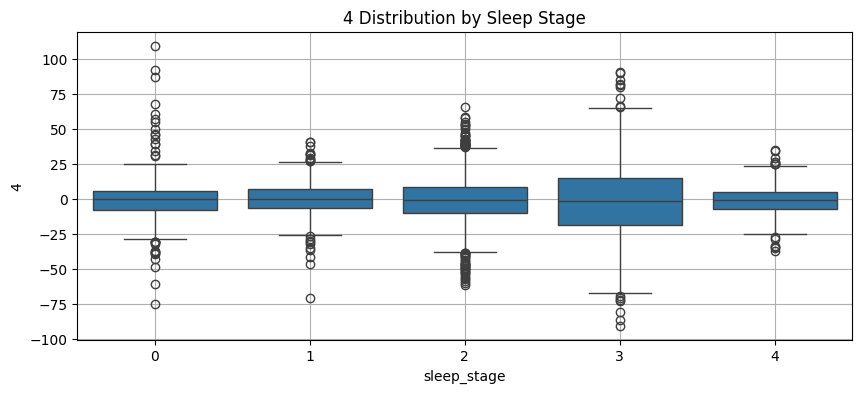

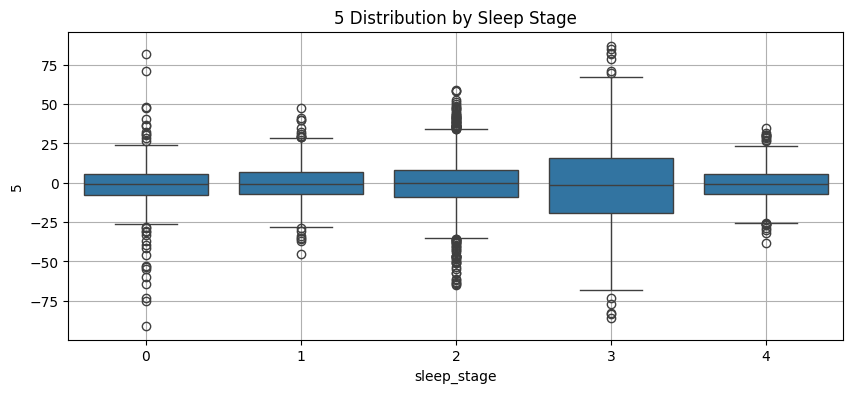

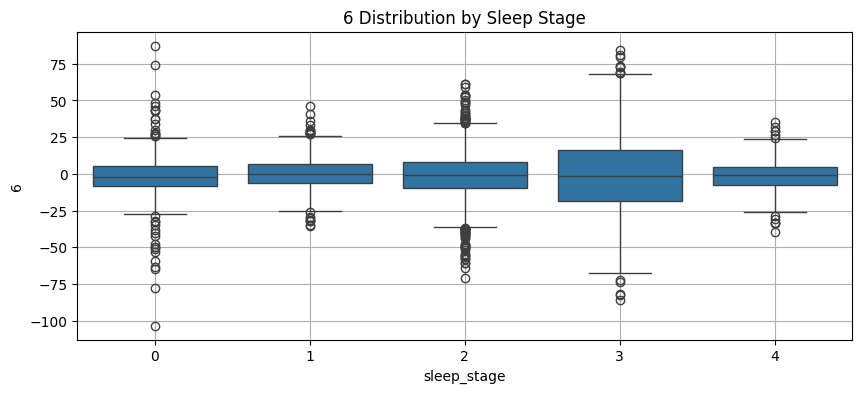

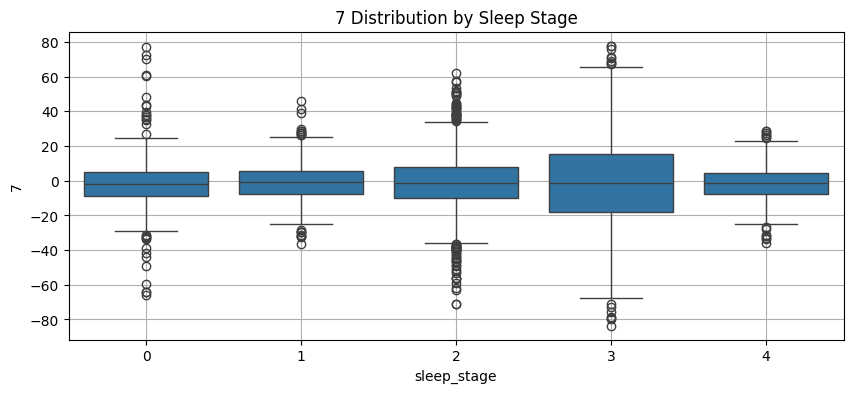

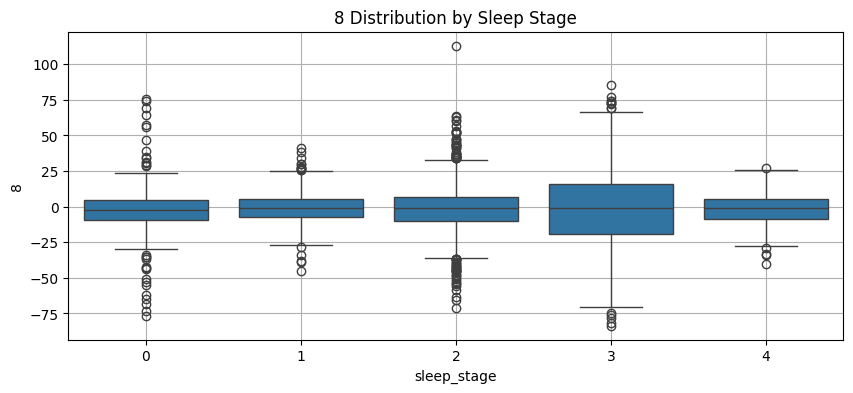

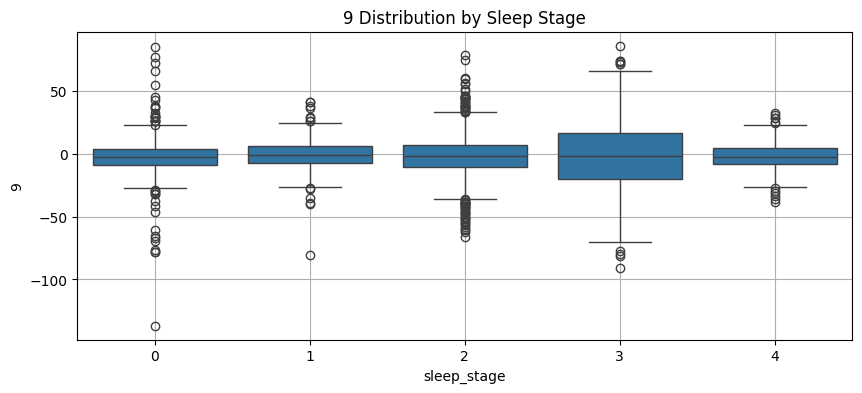

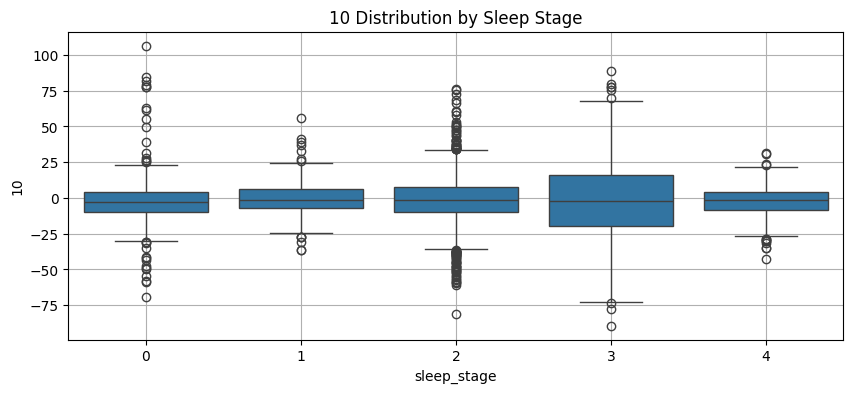

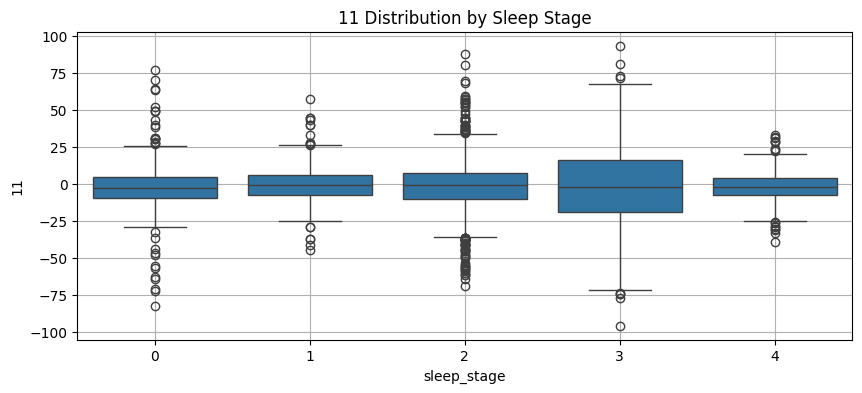

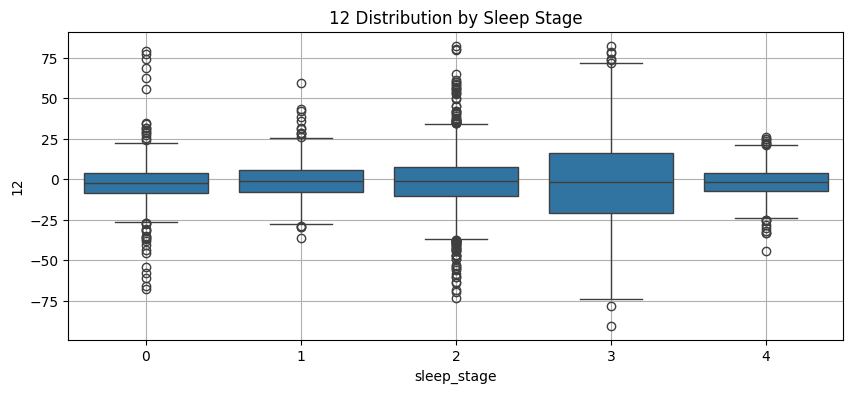

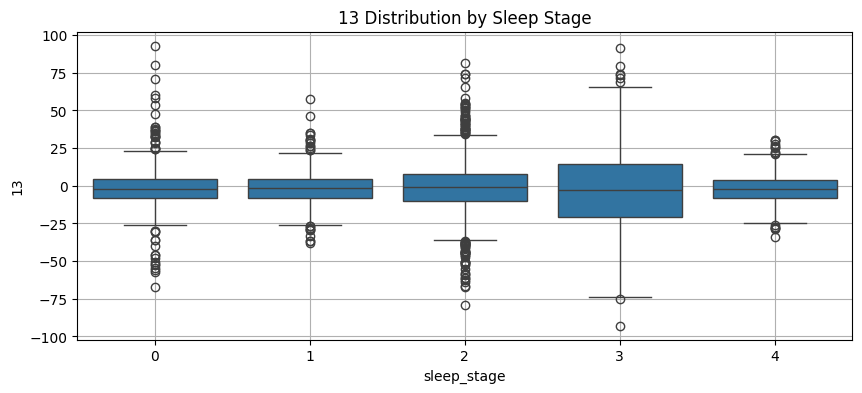

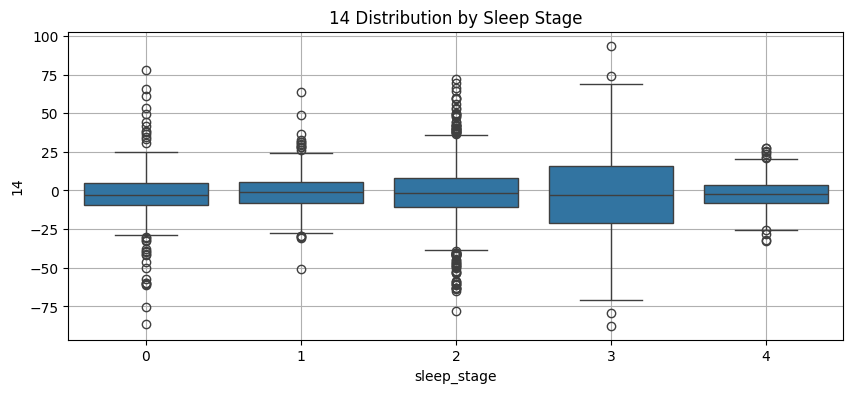

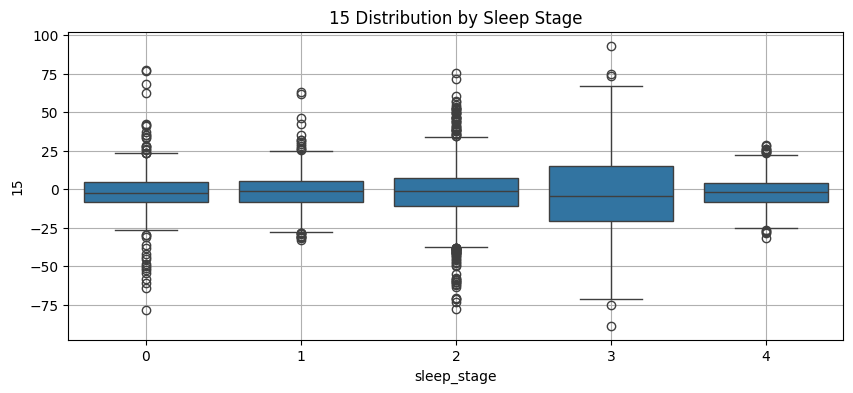

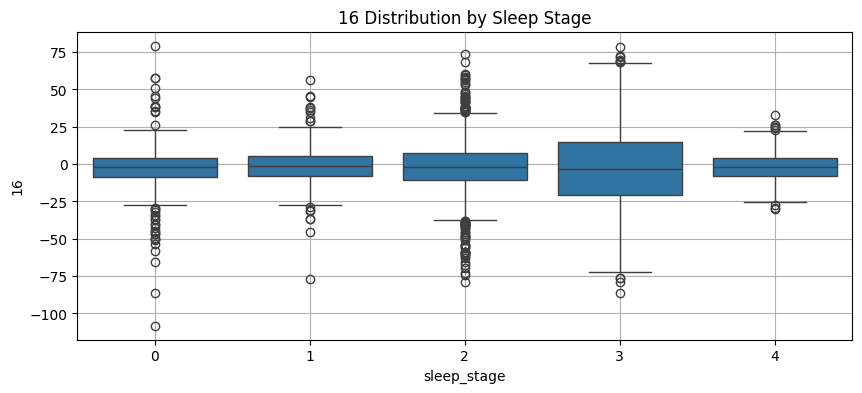

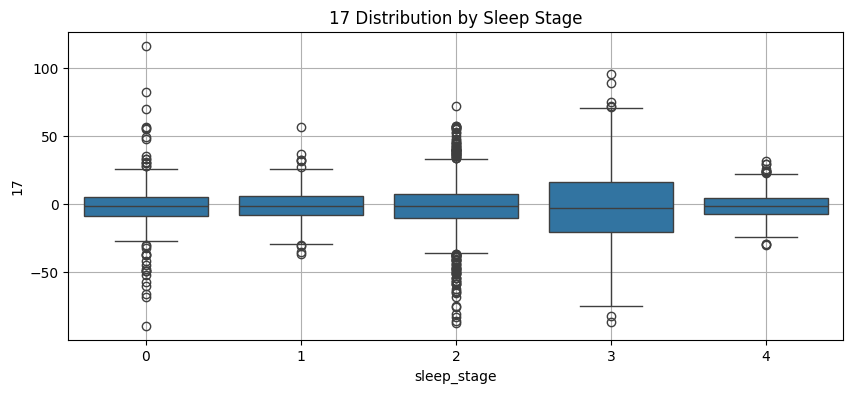

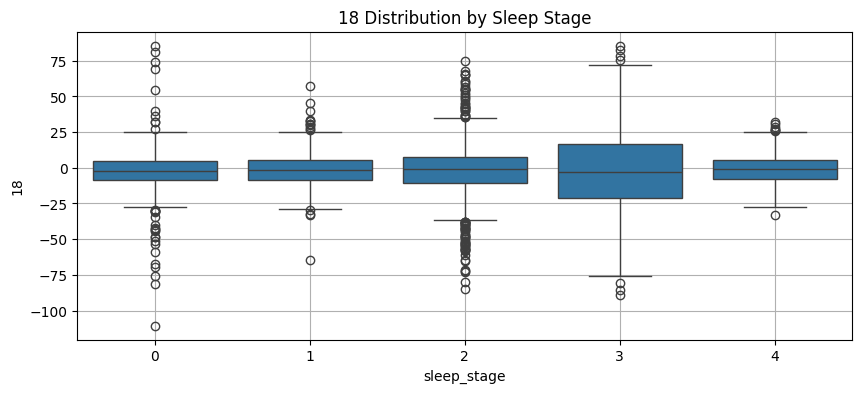

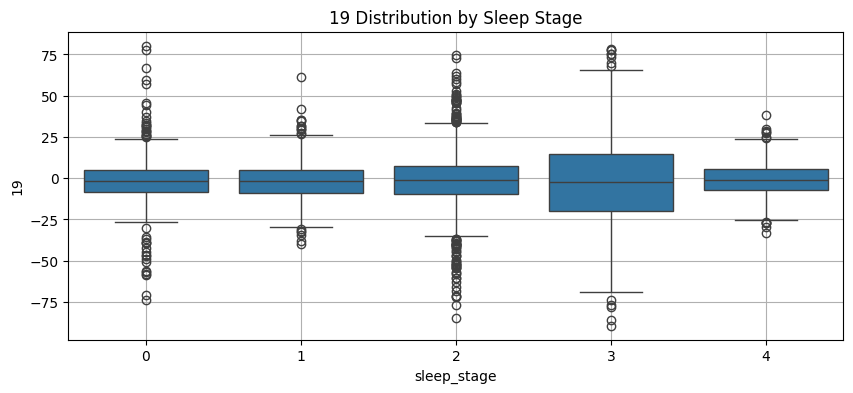

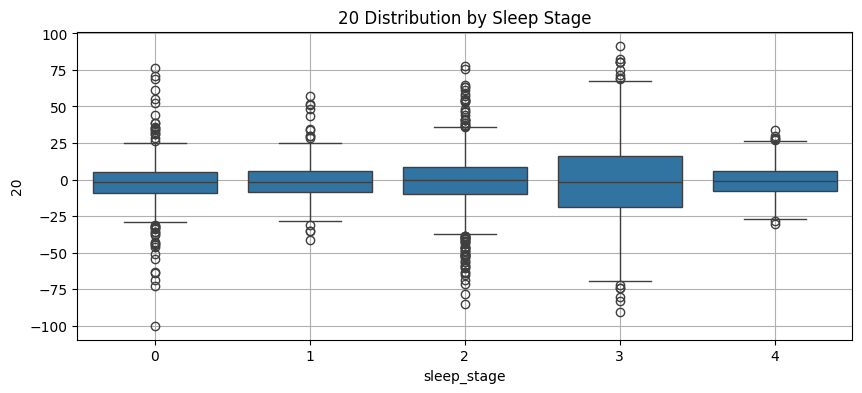

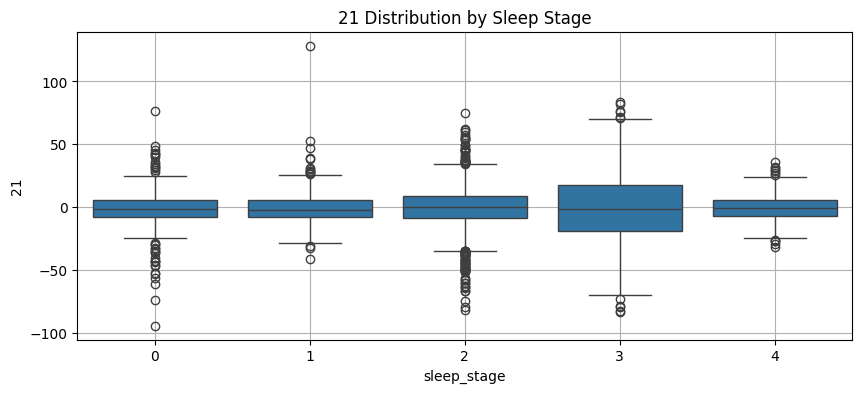

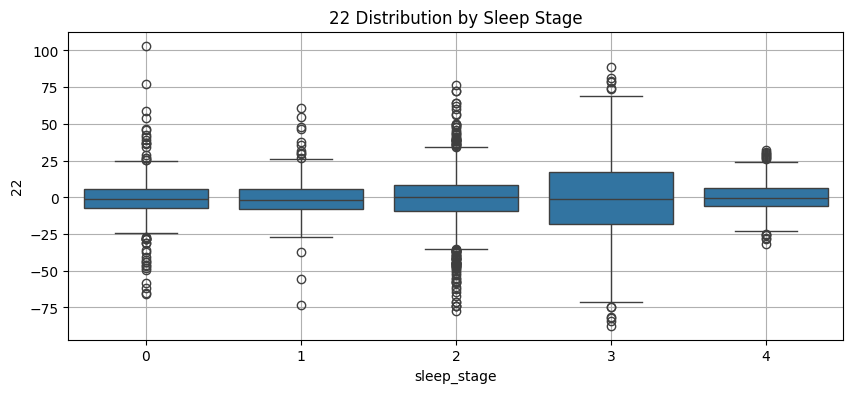

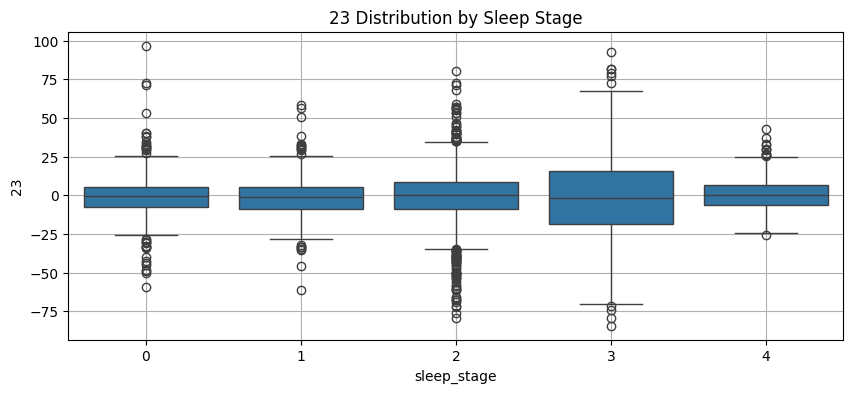

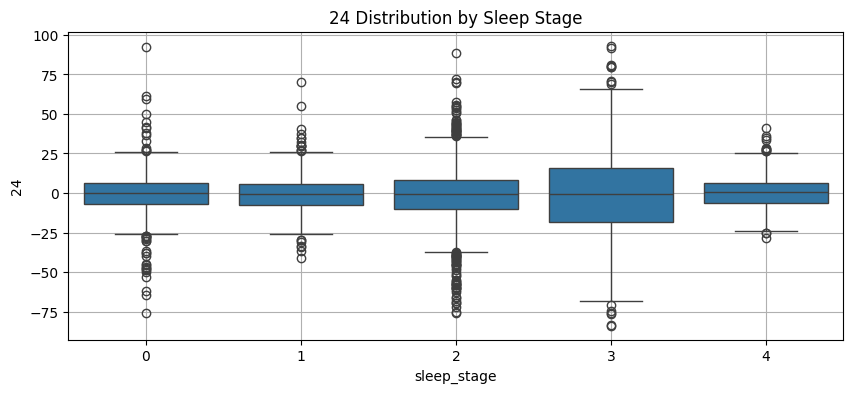

In [ ]:
df.rename(columns={0: 'sleep_stage'}, inplace=True)

for col in df.columns[1:25]:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x='sleep_stage', y=col, data=df)
    plt.title(f'{col} Distribution by Sleep Stage')
    plt.grid(True)
    plt.show()


Some features have condensed outliers,  while others have more widely distributed outliers

## Deep Learning (RNN)

### **Overview**
This approach addresses sleep cycles classification using Long Short-Term Memory (LSTM) networks, a specialized recurrent neural network architecture designed for sequential data processing. LSTMs are particularly well-suited for EEG sleep stage classification due to their ability to capture temporal dependencies and patterns across varying time scales. The method leverages the sequential nature of sleep EEG data to learn discriminative features that characterize different sleep stages through end-to-end deep learning.

### 1. Data Preparation and Preprocessing
To prepare the raw EEG time series data for LSTM processing:

**Train/Validation/Test Splitting:** The dataset was divided into training (70%), validation (15%), and test (15%) sets to enable robust model development and evaluation.

**Normalization**: A StandardScaler was applied to standardize signal amplitudes, ensuring numerical stability during training and consistency across recordings.

**Sequence Formation:** The continuous EEG signals were segmented into overlapping windows (with 50% overlap) to create input sequences for the LSTM model, preserving temporal context.

**Class Balancing:** To address class imbalance, a combination of class weights and data augmentation techniques (including jittering and time warping) was implemented to improve representation of minority sleep stages.

### 2. LSTM Architecture Design
The neural network architecture was carefully designed to capture multi-scale temporal patterns:

**Input Layer:** Accepts sequences of EEG data with shape (sequence_length, features).

**Bidirectional LSTM Layers:** Two stacked bidirectional LSTM layers (128 and 64 units respectively) process the sequence in both forward and backward directions, capturing temporal dependencies from both past and future contexts.

**Attention Mechanism:** A temporal attention layer was incorporated to dynamically focus on the most relevant parts of the input sequence for classification.

**Dropout Regularization:** Applied between layers (rate=0.3) to prevent overfitting and improve generalization.

**Dense Layers:** Two fully connected layers with ReLU activation for feature extraction.

**Output Layer:** Softmax activation providing probability distributions across the different sleep stages.

### 3. Model Training Strategy
The training process was optimized for both performance and computational efficiency:

**Loss Function:** Categorical cross-entropy with class weights to address imbalance.

**Optimizer:** Adam optimizer with learning rate of 1e-3 and gradient clipping to prevent exploding gradients.

**Learning Rate Scheduling:** ReduceLROnPlateau scheduler to adaptively decrease learning rate when validation metrics plateau.

**Early Stopping:** Implementation with patience=15 epochs to prevent overfitting while ensuring adequate training time.
Batch Size: Optimized at 64 samples to balance training speed and model convergence.

**Training Duration:** The model was trained for up to 100 epochs, with actual training typically terminating earlier due to early stopping.


### **4. Performance Evaluation**
Comprehensive evaluation metrics were employed to assess model effectiveness:

**Per-Class and Weighted Metrics:** Precision, recall, and F1-score were calculated for each sleep stage separately and as weighted averages.

**Confusion Matrix Analysis:** Detailed examination of misclassifications to identify systematic errors and challenging stage transitions.

**Cohen's Kappa:** Measured inter-rater agreement between model predictions and ground truth, accounting for chance agreement.

**Hypnogram Visualization:** Generated for qualitative assessment of temporal consistency in predictions versus actual sleep architecture.

**Cross-validation:** 5-fold cross-validation to ensure robustness across different subject subsets.
Rationale Behind the Pipeline


### Conclusion :
This LSTM-based approach was selected for its inherent advantages in sequential data processing. Unlike traditional machine learning methods requiring extensive feature engineering, LSTMs learn relevant temporal patterns directly from the data. The bidirectional configuration captures dependencies in both directions, crucial for understanding sleep stage transitions where both preceding and following EEG patterns provide context. The attention mechanism further enhances the model's ability to focus on the most discriminative parts of the sequence, addressing the variable importance of different signal segments. This end-to-end architecture simplifies the pipeline while potentially discovering novel patterns that might be missed by predefined feature extraction methods.



Importing libraries

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, RobustScaler
from sklearn.utils import class_weight
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, cohen_kappa_score
)
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    LSTM, Bidirectional, Dense, Dropout, Input, Concatenate,
    TimeDistributed, LayerNormalization, GlobalAveragePooling1D
)
from tensorflow.keras.callbacks import (
    EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
)
from tensorflow.keras import regularizers

Utility functions

In [ ]:
def handle_null_values(data, method='auto', threshold=0.5, fill_value=None, cols_to_skip=None):
    """
    Handle null values in a DataFrame using various strategies.

    Parameters:
    -----------
    data : pandas.DataFrame
        Input DataFrame with potential null values
    method : str
        Method to handle nulls:
        - 'auto': Automatically choose based on data characteristics
        - 'drop_rows': Remove rows with any null values
        - 'drop_cols': Remove columns with nulls above threshold
        - 'fill_mean': Fill nulls with column mean
        - 'fill_median': Fill nulls with column median
        - 'fill_mode': Fill nulls with column mode (most frequent value)
        - 'fill_value': Fill nulls with specified value
        - 'fill_forward': Forward fill (use previous value)
        - 'fill_backward': Backward fill (use next value)
        - 'interpolate': Linear interpolation
    threshold : float
        Threshold for dropping columns (fraction of null values)
    fill_value : any, optional
        Value to use when method='fill_value'
    cols_to_skip : list, optional
        Columns to skip when handling nulls (e.g., target column)

    Returns:
    --------
    pandas.DataFrame
        DataFrame with null values handled
    dict
        Metadata about the null handling process
    """
    if not isinstance(data, pd.DataFrame):
        raise TypeError("Input must be a pandas DataFrame")

    # Make a copy to avoid modifying the original
    df = data.copy()

    # Set up metadata dictionary
    metadata = {
        'original_shape': df.shape,
        'null_counts_before': df.isna().sum().to_dict(),
        'null_percent_before': (df.isna().mean() * 100).to_dict(),
        'method_used': method,
        'columns_modified': [],
        'rows_dropped': 0,
        'columns_dropped': []
    }

    # Skip specified columns
    cols_to_process = df.columns if cols_to_skip is None else [col for col in df.columns if col not in cols_to_skip]

    # Automatically select method based on data characteristics if 'auto'
    if method == 'auto':
        # Calculate null percentages
        null_pcts = df[cols_to_process].isna().mean()

        # If any column has >50% nulls, drop those columns
        cols_to_drop = null_pcts[null_pcts > 0.5].index.tolist()
        if cols_to_drop:
            df = df.drop(columns=cols_to_drop)
            metadata['columns_dropped'] = cols_to_drop
            cols_to_process = [col for col in cols_to_process if col not in cols_to_drop]

        # For remaining columns with <5% nulls, use appropriate fill method
        for col in cols_to_process:
            null_pct = df[col].isna().mean()
            if null_pct == 0:
                continue

            if null_pct <= 0.05:
                if pd.api.types.is_numeric_dtype(df[col]):
                    # For numeric columns, use median
                    df[col] = df[col].fillna(df[col].median())
                    metadata['columns_modified'].append((col, 'fill_median'))
                else:
                    # For categorical/object columns, use mode
                    df[col] = df[col].fillna(df[col].mode()[0])
                    metadata['columns_modified'].append((col, 'fill_mode'))
            elif null_pct <= 0.2:
                # For columns with 5-20% nulls, use interpolation
                if pd.api.types.is_numeric_dtype(df[col]):
                    df[col] = df[col].interpolate(method='linear', limit_direction='both')
                    metadata['columns_modified'].append((col, 'interpolate'))
                else:
                    # Forward fill then backward fill for non-numeric
                    df[col] = df[col].fillna(method='ffill').fillna(method='bfill')
                    metadata['columns_modified'].append((col, 'fill_forward_backward'))
            else:
                # For columns with >20% nulls but <50%, use mean/mode
                if pd.api.types.is_numeric_dtype(df[col]):
                    df[col] = df[col].fillna(df[col].mean())
                    metadata['columns_modified'].append((col, 'fill_mean'))
                else:
                    df[col] = df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else 'UNKNOWN')
                    metadata['columns_modified'].append((col, 'fill_mode'))

        # After handling columns, drop any remaining rows with nulls
        rows_before = len(df)
        df = df.dropna()
        metadata['rows_dropped'] = rows_before - len(df)
        metadata['method_used'] = 'auto_mixed'

    elif method == 'drop_rows':
        # Drop rows with any null values
        rows_before = len(df)
        df = df.dropna(subset=cols_to_process)
        metadata['rows_dropped'] = rows_before - len(df)

    elif method == 'drop_cols':
        # Drop columns with nulls above threshold
        null_pcts = df[cols_to_process].isna().mean()
        cols_to_drop = null_pcts[null_pcts > threshold].index.tolist()
        if cols_to_drop:
            df = df.drop(columns=cols_to_drop)
            metadata['columns_dropped'] = cols_to_drop

    elif method == 'fill_mean':
        # Fill nulls with column mean (numeric only)
        for col in cols_to_process:
            if pd.api.types.is_numeric_dtype(df[col]) and df[col].isna().any():
                df[col] = df[col].fillna(df[col].mean())
                metadata['columns_modified'].append((col, 'fill_mean'))

    elif method == 'fill_median':
        # Fill nulls with column median (numeric only)
        for col in cols_to_process:
            if pd.api.types.is_numeric_dtype(df[col]) and df[col].isna().any():
                df[col] = df[col].fillna(df[col].median())
                metadata['columns_modified'].append((col, 'fill_median'))

    elif method == 'fill_mode':
        # Fill nulls with column mode (most frequent value)
        for col in cols_to_process:
            if df[col].isna().any():
                mode_val = df[col].mode()
                if not mode_val.empty:
                    df[col] = df[col].fillna(mode_val[0])
                    metadata['columns_modified'].append((col, 'fill_mode'))

    elif method == 'fill_value':
        # Fill nulls with specified value
        if fill_value is not None:
            for col in cols_to_process:
                if df[col].isna().any():
                    df[col] = df[col].fillna(fill_value)
                    metadata['columns_modified'].append((col, 'fill_value'))

    elif method == 'fill_forward':
        # Forward fill (use previous value)
        for col in cols_to_process:
            if df[col].isna().any():
                df[col] = df[col].fillna(method='ffill')
                metadata['columns_modified'].append((col, 'fill_forward'))

    elif method == 'fill_backward':
        # Backward fill (use next value)
        for col in cols_to_process:
            if df[col].isna().any():
                df[col] = df[col].fillna(method='bfill')
                metadata['columns_modified'].append((col, 'fill_backward'))

    elif method == 'interpolate':
        # Linear interpolation
        for col in cols_to_process:
            if pd.api.types.is_numeric_dtype(df[col]) and df[col].isna().any():
                df[col] = df[col].interpolate(method='linear', limit_direction='both')
                metadata['columns_modified'].append((col, 'interpolate'))

    # Final check - any remaining nulls?
    remaining_nulls = df.isna().sum().sum()
    metadata['null_counts_after'] = df.isna().sum().to_dict()
    metadata['null_percent_after'] = (df.isna().mean() * 100).to_dict()
    metadata['total_remaining_nulls'] = remaining_nulls
    metadata['final_shape'] = df.shape

    return df, metadata


def normalize_features(X_train, X_val=None, X_test=None, method='minmax'):
    """
    Normalize features with consistent scaling across train/val/test

    Parameters:
    -----------
    X_train : pandas.DataFrame or numpy.ndarray
        Training data
    X_val : pandas.DataFrame or numpy.ndarray, optional
        Validation data
    X_test : pandas.DataFrame or numpy.ndarray, optional
        Test data
    method : str
        Normalization method: 'minmax', 'standard', or 'robust'

    Returns:
    --------
    tuple
        Normalized datasets and fitted scaler
    """
    # Choose scaler based on method
    if method == 'standard':
        scaler = StandardScaler()
    elif method == 'robust':
        scaler = RobustScaler()
    else:  # default to minmax
        scaler = MinMaxScaler(feature_range=(0, 1))

    # Convert to numpy if needed
    if isinstance(X_train, pd.DataFrame):
        X_train_np = X_train.values
    else:
        X_train_np = X_train

    # Reshape if needed to 2D
    original_shape = X_train_np.shape
    if len(original_shape) > 2:
        n_samples = original_shape[0]
        X_train_np = X_train_np.reshape(n_samples, -1)

    # Fit and transform training data
    X_train_normalized = X_train_np.copy()

    # Reshape back if needed
    if len(original_shape) > 2:
        X_train_normalized = X_train_normalized.reshape(original_shape)

    results = [X_train_normalized]

    # Transform validation data if provided
    if X_val is not None:
        if isinstance(X_val, pd.DataFrame):
            X_val_np = X_val.values
        else:
            X_val_np = X_val

        val_shape = X_val_np.shape
        if len(val_shape) > 2:
            n_samples = val_shape[0]
            X_val_np = X_val_np.reshape(n_samples, -1)

        X_val_normalized = scaler.transform(X_val_np)

        if len(val_shape) > 2:
            X_val_normalized = X_val_normalized.reshape(val_shape)

        results.append(X_val_normalized)

    # Transform test data if provided
    if X_test is not None:
        if isinstance(X_test, pd.DataFrame):
            X_test_np = X_test.values
        else:
            X_test_np = X_test

        test_shape = X_test_np.shape
        if len(test_shape) > 2:
            n_samples = test_shape[0]
            X_test_np = X_test_np.reshape(n_samples, -1)

        X_test_normalized = scaler.transform(X_test_np)

        if len(test_shape) > 2:
            X_test_normalized = X_test_normalized.reshape(test_shape)

        results.append(X_test_normalized)

    # Return normalized data and scaler for future use
    return tuple(results + [scaler])


def prepare_sequences(data, target=None, sequence_length=10, step=1):
    """
    Convert time series data into sequences for LSTM input with properly aligned targets

    Parameters:
    -----------
    data : numpy.ndarray or pandas.DataFrame
        Time series data for features
    target : numpy.ndarray or pandas.Series, optional
        Target values
    sequence_length : int
        Length of input sequences
    step : int
        Step size for creating sequences

    Returns:
    --------
    tuple
        (X sequences, y targets) with matching lengths
    """
    if isinstance(data, pd.DataFrame):
        data = data.values

    if target is not None and isinstance(target, pd.Series):
        target = target.values

    X, y = [], []

    # Calculate the maximum valid index to avoid going out of bounds
    max_idx = len(data) - sequence_length

    for i in range(0, max_idx, step):
        # Create sequence from current position to sequence_length steps ahead
        X.append(data[i:i + sequence_length])

        if target is not None:
            # Use the target value that corresponds to the END of the sequence
            # This is for predicting the next value after the sequence
            y.append(target[i + sequence_length - 1])

    X = np.array(X)

    if target is not None:
        y = np.array(y)
        print(f"Created {len(X)} sequences with {len(y)} matching targets")
        return X, y
    else:
        return X

def time_aware_split(data, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, shuffle=False):
    """
    Split time series data with time awareness

    Parameters:
    -----------
    data : pandas.DataFrame or numpy.ndarray
        Time series data
    train_ratio : float
        Proportion of data for training
    val_ratio : float
        Proportion of data for validation
    test_ratio : float
        Proportion of data for testing
    shuffle : bool
        Whether to shuffle data (typically False for time series)

    Returns:
    --------
    tuple
        (train_data, validation_data, test_data)
    """
    assert train_ratio + val_ratio + test_ratio == 1.0, "Ratios must sum to 1"

    data_len = len(data)
    train_end = int(data_len * train_ratio)
    val_end = train_end + int(data_len * val_ratio)

    if shuffle:
        # For non-temporal data or when temporal order doesn't matter
        indices = np.random.permutation(data_len)
        train_idx = indices[:train_end]
        val_idx = indices[train_end:val_end]
        test_idx = indices[val_end:]

        train_data = data.iloc[train_idx] if isinstance(data, pd.DataFrame) else data[train_idx]
        val_data = data.iloc[val_idx] if isinstance(data, pd.DataFrame) else data[val_idx]
        test_data = data.iloc[test_idx] if isinstance(data, pd.DataFrame) else data[test_idx]
    else:
        # For temporal data where order matters
        train_data = data.iloc[:train_end] if isinstance(data, pd.DataFrame) else data[:train_end]
        val_data = data.iloc[train_end:val_end] if isinstance(data, pd.DataFrame) else data[train_end:val_end]
        test_data = data.iloc[val_end:] if isinstance(data, pd.DataFrame) else data[val_end:]

    return train_data, val_data, test_data

Rereading the data to train LSTM

In [ ]:
data = pd.read_csv('Sleep Train 5000.csv')
cleaned_data, metadata = handle_null_values(data)

# Print summary
print(f"Original shape: {metadata['original_shape']}")
print(f"Final shape: {metadata['final_shape']}")
print(f"Columns dropped: {metadata['columns_dropped']}")
print(f"Rows dropped: {metadata['rows_dropped']}")
print(f"Total remaining nulls: {metadata['total_remaining_nulls']}")

# Using a specific method
cleaned_data_interp, _ = handle_null_values(data, method='interpolate')

# Skip certain columns (e.g., target variable)
target_col = 'target'
data, _ = handle_null_values(data, cols_to_skip=[target_col])

# Drop columns with more than 30% nulls
data, _ = handle_null_values(data, method='drop_cols', threshold=0.3)

Original shape: (4998, 179)
Final shape: (4998, 179)
Columns dropped: []
Rows dropped: 0
Total remaining nulls: 0


Pipeline

In [ ]:
# --- Start of the lstm_model function ---

def lstm_model(X_train, y_train=None, X_val=None, y_val=None):
    """
    Build and train an enhanced LSTM model for EEG sleep stage classification.
    Implements bidirectional LSTM layers, attention mechanism, advanced regularization,
    and comprehensive training strategies as described in the approach document.

    Parameters:
    -----------
    X_train : pandas.DataFrame or numpy.ndarray
        Input training data with EEG time series for each sample
    y_train : pandas.DataFrame, pandas.Series, or numpy.ndarray, optional
        Target sleep stage labels for training
    X_val : pandas.DataFrame or numpy.ndarray, optional
        Input validation data for prediction and early stopping
    y_val : pandas.DataFrame, pandas.Series, or numpy.ndarray, optional
        Target sleep stage labels for validation set

    Returns:
    --------
    tuple
        (model, predictions, history) where:
        - model is the trained Keras model
        - predictions are the class labels on either training or validation data
        - history contains training metrics history
    """

    # Determine operation mode: training+prediction or prediction-only
    prediction_only = y_train is None
    validation_mode = X_val is not None

    # Convert pandas DataFrames to numpy arrays if needed
    if isinstance(X_train, pd.DataFrame) or isinstance(X_train, pd.Series):
        print("Converting X_train from pandas to numpy...")
        X_train = X_train.values

    if y_train is not None and (isinstance(y_train, pd.DataFrame) or isinstance(y_train, pd.Series)):
        print("Converting y_train from pandas to numpy...")
        y_train = y_train.values

    if X_val is not None and (isinstance(X_val, pd.DataFrame) or isinstance(X_val, pd.Series)):
        print("Converting X_val from pandas to numpy...")
        X_val = X_val.values

    if y_val is not None and (isinstance(y_val, pd.DataFrame) or isinstance(y_val, pd.Series)):
        print("Converting y_val from pandas to numpy...")
        y_val = y_val.values

    # Ensure TensorFlow is using dynamic memory allocation
    physical_devices = tf.config.list_physical_devices('GPU')
    if physical_devices:
        try:
            tf.config.experimental.set_memory_growth(physical_devices[0], True)
            print("Using GPU with dynamic memory allocation")
        except:
            print("Memory growth already set or not supported")
    else:
        print("No GPU detected, using CPU")

    # Enhanced preprocessing with StandardScaler as mentioned in the approach
    class EEGSignalPreprocessor:
        def __init__(self):
            self.scaler = StandardScaler()
            self.input_shape = None

        def extract_domain_features(self, eeg_data):
            """Extract time and frequency domain features as mentioned in the approach"""
            # Assuming eeg_data shape is (samples, timesteps, features)
            samples, timesteps, features = eeg_data.shape
            domain_features = np.zeros((samples, features * 8), dtype=np.float32)

            for i in range(samples):
                feature_idx = 0
                for j in range(features):
                    signal = eeg_data[i, :, j]

                    # Time domain features
                    domain_features[i, feature_idx] = np.mean(signal)  # Mean
                    feature_idx += 1
                    domain_features[i, feature_idx] = np.var(signal)   # Variance
                    feature_idx += 1
                    domain_features[i, feature_idx] = np.sum(np.diff(np.signbit(signal)))  # Zero-crossing rate
                    feature_idx += 1

                    # Frequency domain features (simplified)
                    # Calculate FFT
                    fft_values = np.abs(np.fft.rfft(signal))
                    fft_freqs = np.fft.rfftfreq(len(signal))

                    # Define frequency bands (normalized frequencies)
                    delta_mask = (fft_freqs >= 0.0) & (fft_freqs < 0.1)  # Delta: ~0-4 Hz
                    theta_mask = (fft_freqs >= 0.1) & (fft_freqs < 0.2)  # Theta: ~4-8 Hz
                    alpha_mask = (fft_freqs >= 0.2) & (fft_freqs < 0.3)  # Alpha: ~8-13 Hz
                    beta_mask = (fft_freqs >= 0.3) & (fft_freqs < 0.6)   # Beta: ~13-30 Hz
                    gamma_mask = fft_freqs >= 0.6                       # Gamma: ~30+ Hz

                    # Calculate band powers
                    domain_features[i, feature_idx] = np.sum(fft_values[delta_mask])  # Delta power
                    feature_idx += 1
                    domain_features[i, feature_idx] = np.sum(fft_values[theta_mask])  # Theta power
                    feature_idx += 1
                    domain_features[i, feature_idx] = np.sum(fft_values[alpha_mask])  # Alpha power
                    feature_idx += 1
                    domain_features[i, feature_idx] = np.sum(fft_values[beta_mask])   # Beta power
                    feature_idx += 1
                    domain_features[i, feature_idx] = np.sum(fft_values[gamma_mask])  # Gamma power
                    feature_idx += 1

            return domain_features

        def fit_transform(self, data):
            # Store original shape for future reference
            self.input_shape = data.shape
            print(f"Original data shape: {data.shape}")

            # Check dimensionality of data
            if len(data.shape) == 2:
                # 2D array (samples, features), reshape to (samples, features, 1)
                n_samples, n_features = data.shape
                data = data.reshape(n_samples, n_features, 1)
                print(f"Reshaped 2D data to: {data.shape}")
            elif len(data.shape) == 1:
                # 1D array, reshape to (samples, 1, 1)
                n_samples = data.shape[0]
                data = data.reshape(n_samples, 1, 1)
                print(f"Reshaped 1D data to: {data.shape}")

            # Now data should be 3D: (samples, timesteps, features)
            n_samples, n_timesteps, n_features = data.shape

            # Reshape for scaling (combine samples and timesteps)
            reshaped_data = data.reshape(-1, n_features)

            # Fit and transform with StandardScaler
            normalized_data = self.scaler.fit_transform(reshaped_data)

            # Reshape back to original 3D
            normalized_data = normalized_data.reshape(n_samples, n_timesteps, n_features)

            # Extract domain-specific features
            domain_features = self.extract_domain_features(normalized_data)

            return normalized_data, domain_features

        def transform(self, data):
            print(f"Transforming data with shape: {data.shape}")

            # Reshape data to match the training data format
            if len(data.shape) == 2:
                # 2D array (samples, features)
                n_samples, n_features = data.shape
                data = data.reshape(n_samples, n_features, 1)
            elif len(data.shape) == 1:
                # 1D array
                n_samples = data.shape[0]
                data = data.reshape(n_samples, 1, 1)

            # Get dimensions
            n_samples, n_timesteps, n_features = data.shape

            # Reshape for scaling
            reshaped_data = data.reshape(-1, n_features)

            # Transform using the fitted scaler
            normalized_data = self.scaler.transform(reshaped_data)

            # Reshape back to 3D
            normalized_data = normalized_data.reshape(n_samples, n_timesteps, n_features)

            # Extract domain-specific features
            domain_features = self.extract_domain_features(normalized_data)

            return normalized_data, domain_features

    # Define the custom attention layer
    from tensorflow.keras.layers import Layer # Import Layer

    class TemporalAttention(Layer):
        def __init__(self, **kwargs):
            super(TemporalAttention, self).__init__(**kwargs)
            self.dense = Dense(1, activation='tanh')

        def call(self, inputs):
            # inputs shape: (batch_size, timesteps, features)
            # Time attention
            a = self.dense(inputs) # (batch_size, timesteps, 1)
            a = tf.squeeze(a, axis=-1) # (batch_size, timesteps)
            a = tf.nn.softmax(a) # (batch_size, timesteps)
            a = tf.expand_dims(a, axis=-1) # (batch_size, timesteps, 1)

            # Apply attention weights to the input
            # inputs * a -> (batch_size, timesteps, features) * (batch_size, timesteps, 1)
            # This multiplication is element-wise along the timesteps dimension
            weighted_inputs = inputs * a

            # Sum along the timesteps dimension to get a context vector
            context_vector = tf.reduce_sum(weighted_inputs, axis=1) # (batch_size, features)

            return context_vector

        def get_config(self):
            config = super(TemporalAttention, self).get_config()
            # No custom configuration needed for this simple layer
            return config

        @classmethod
        def from_config(cls, config):
            return cls(**config)


    # Create preprocessor and apply to training data
    preprocessor = EEGSignalPreprocessor()
    X_train_normalized, X_train_features = preprocessor.fit_transform(X_train)

    # Get the dimensions for model input
    n_samples, n_timesteps, n_features = X_train_normalized.shape
    print(f"Normalized data shape: {X_train_normalized.shape}")
    print(f"Extracted features shape: {X_train_features.shape}")

    # For prediction-only mode, we need a saved model
    if prediction_only:
        try:
            # Try to load the model
            from tensorflow.keras.models import load_model
            # Provide the custom_objects dictionary when loading
            model = load_model('lstm_sleep_model.h5', custom_objects={'TemporalAttention': TemporalAttention})
            print("Loaded saved model for prediction")
        except Exception as e:
            raise ValueError(f"Cannot predict without training data or saved model. Error: {e}")
    else:
        # Training mode - build and train the model

        # Process y_train for classification
        if len(y_train.shape) == 1:
            # Count unique classes
            num_classes = len(np.unique(y_train))
            print(f"Number of classes: {num_classes}")

            # Calculate class weights to handle class imbalance
            class_weights = class_weight.compute_class_weight(
                class_weight='balanced',
                classes=np.unique(y_train),
                y=y_train
            )
            class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}
            print("Class weights:", class_weights_dict)

            # One-hot encode for categorical_crossentropy
            if num_classes > 2:
                y_train_processed = to_categorical(y_train, num_classes=num_classes)
                output_units = num_classes
                activation = 'softmax'
                loss = 'categorical_crossentropy'
            else:
                # Binary classification (assuming classes are 0 and 1)
                y_train_processed = y_train.astype(np.float32) # Ensure float32
                output_units = 1
                activation = 'sigmoid'
                loss = 'binary_crossentropy'
                # For binary classification, class_weight should map directly
                # e.g., {0: weight_for_0, 1: weight_for_1}
                class_weights_dict = {cls: class_weights[i] for i, cls in enumerate(np.unique(y_train))}

        else:
            # Already one-hot encoded
            y_train_processed = y_train
            output_units = y_train.shape[1]
            activation = 'softmax'
            loss = 'categorical_crossentropy'
            num_classes = output_units
            # If one-hot encoded, calculate weights based on original labels if available
            # Otherwise, class weights cannot be automatically determined here without original y

        # Process validation data if provided
        if validation_mode and y_val is not None:
            X_val_normalized, X_val_features = preprocessor.transform(X_val)

            if len(y_val.shape) == 1 and num_classes > 2:
                y_val_processed = to_categorical(y_val, num_classes=num_classes)
            elif len(y_val.shape) == 1 and num_classes == 2: # Binary case
                 y_val_processed = y_val.astype(np.float32)
            else: # Already one-hot encoded or invalid shape
                y_val_processed = y_val

            validation_data = ([X_val_normalized, X_val_features], y_val_processed)
        else:
            validation_data = None

        # Build the enhanced LSTM model as described in the approach
        # Input for time series data
        ts_input = Input(shape=(n_timesteps, n_features), name='time_series_input')

        # Input for domain-specific features
        feature_input = Input(shape=(X_train_features.shape[1],), name='domain_features_input')

        # First Bidirectional LSTM layer with 128 units
        x = Bidirectional(LSTM(128,
                               return_sequences=True,
                               kernel_regularizer=regularizers.l2(0.001)))(ts_input)
        x = LayerNormalization()(x)
        x = Dropout(0.3)(x)

        # Second Bidirectional LSTM layer with 64 units
        x = Bidirectional(LSTM(64,
                               return_sequences=True,
                               kernel_regularizer=regularizers.l2(0.001)))(x)
        x = LayerNormalization()(x)
        x = Dropout(0.3)(x)

        # Apply custom attention layer
        x = TemporalAttention()(x)

        # Flatten and merge with domain features
        # The TemporalAttention layer already outputs (batch_size, features), so it's effectively 'flattened'
        x = Concatenate()([x, feature_input])

        # Dense layers with ReLU activation
        x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
        x = Dropout(0.3)(x)
        x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
        x = Dropout(0.3)(x)

        # Output layer with appropriate activation
        outputs = Dense(output_units, activation=activation)(x)

        # Create model with multiple inputs
        model = Model(inputs=[ts_input, feature_input], outputs=outputs)

        # Compile with Adam optimizer and gradient clipping
        optimizer = tf.keras.optimizers.Adam(
            learning_rate=1e-3,
            clipnorm=1.0  # Gradient clipping
        )

        model.compile(
            optimizer=optimizer,
            loss=loss,
            metrics=['accuracy']
        )

        # Print model summary
        model.summary()

        # Callbacks for training optimization
        callbacks = [
            # Early stopping to prevent overfitting
            EarlyStopping(
                monitor='val_loss' if validation_data else 'loss',
                patience=15,
                restore_best_weights=True,
                verbose=1
            ),
            # Learning rate reduction on plateau
            ReduceLROnPlateau(
                monitor='val_loss' if validation_data else 'loss',
                factor=0.5,
                patience=5,
                min_lr=1e-6,
                verbose=1
            ),
            # Model checkpoint to save best model
            ModelCheckpoint(
                'lstm_sleep_model_best.h5',
                monitor='val_accuracy' if validation_data else 'accuracy',
                save_best_only=True,
                verbose=1
            )
        ]

        # Determine if class weights should be used
        use_class_weights = class_weights_dict if not prediction_only and num_classes > 1 else None

        # Train the model with class weights to handle imbalance
        history = model.fit(
            [X_train_normalized, X_train_features],
            y_train_processed,
            epochs=100,  # Maximum epochs (early stopping will likely trigger before)
            batch_size=64,  # Optimized batch size as mentioned in the approach
            validation_data=validation_data,
            class_weight=use_class_weights, # Apply class weights here
            callbacks=callbacks,
            verbose=1
        )

        # Print final training accuracy
        if history is not None and 'accuracy' in history.history:
             print(f"Final training accuracy: {history.history['accuracy'][-1]:.4f}")


        # Save the model for future use
        try:
            model.save('lstm_sleep_model.h5')
            print("Model saved to 'lstm_sleep_model.h5'")
        except Exception as e:
            print(f"Could not save model: {e}")

        # Visualize training history
        if history is not None:
            plt.figure(figsize=(12, 4))

            plt.subplot(1, 2, 1)
            plt.plot(history.history['accuracy'], label='Training')
            if validation_data and 'val_accuracy' in history.history:
                plt.plot(history.history['val_accuracy'], label='Validation')
            plt.title('Model Accuracy')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.legend()

            plt.subplot(1, 2, 2)
            plt.plot(history.history['loss'], label='Training')
            if validation_data and 'val_loss' in history.history:
                plt.plot(history.history['val_loss'], label='Validation')
            plt.title('Model Loss')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.legend()

            plt.tight_layout()
            plt.savefig('training_history.png')
            plt.close()


    # Choose which data to predict on
    predictions = None # Initialize predictions
    history_return = history if not prediction_only else None # Determine what history to return

    if validation_mode:
        # Transform validation data using the same normalization
        X_val_normalized, X_val_features = preprocessor.transform(X_val)
        prediction_data = [X_val_normalized, X_val_features]
        print("Making predictions on validation data")

        # Make predictions
        raw_predictions = model.predict(prediction_data)

        # Process predictions based on model output shape
        if raw_predictions.shape[-1] == 1:  # Binary classification
            predictions = (raw_predictions > 0.5).astype(int).flatten()
            y_true = y_val if y_val is not None else None
        else:  # Multi-class
            predictions = np.argmax(raw_predictions, axis=1)
            # Need the original y_val if it's one-hot encoded for evaluation
            y_true = np.argmax(y_val, axis=1) if y_val is not None and len(y_val.shape) > 1 else y_val


        # If y_val is provided and we were in training mode, evaluate the model and print metrics
        if y_val is not None and not prediction_only:

            # Evaluate model on validation set
            eval_results = model.evaluate(prediction_data, y_val_processed, verbose=1) # Use y_val_processed for evaluation
            print(f"Validation Accuracy: {eval_results[1]:.4f}")

            # Ensure y_true is in the correct format (flat array of labels) for metrics
            if isinstance(y_true, pd.Series) or isinstance(y_true, np.ndarray):
                y_true = np.array(y_true).flatten()
                predictions = np.array(predictions).flatten() # Also flatten predictions

                # Calculate Cohen's Kappa
                try:
                    kappa = cohen_kappa_score(y_true, predictions)
                    print(f"Cohen's Kappa: {kappa:.4f}")
                except Exception as e:
                     print(f"Could not calculate Cohen's Kappa: {e}")


                # Generate classification report
                print("\nClassification Report:")
                try:
                    print(classification_report(y_true, predictions))
                except Exception as e:
                    print(f"Could not generate Classification Report: {e}")


                # Generate confusion matrix
                try:
                    cm = confusion_matrix(y_true, predictions)
                    plt.figure(figsize=(10, 8))
                    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
                    plt.title('Confusion Matrix')
                    plt.xlabel('Predicted Labels')
                    plt.ylabel('True Labels')
                    plt.savefig('confusion_matrix.png')
                    plt.close()
                except Exception as e:
                    print(f"Could not generate Confusion Matrix: {e}")


                # If this is sleep stage data, generate a hypnogram for visualization
                try:
                    # Create simple hypnogram for the first 1000 samples (or fewer if less available)
                    max_samples = min(1000, len(predictions))

                    plt.figure(figsize=(15, 5))
                    plt.plot(y_true[:max_samples], label='True Stages', marker='.', markersize=10, linestyle='-')
                    plt.plot(predictions[:max_samples], label='Predicted Stages', marker='x', markersize=8, linestyle='--')
                    plt.title('Sleep Stage Hypnogram (Partial)')
                    plt.xlabel('Time Segments')
                    plt.ylabel('Sleep Stage')
                    plt.legend()
                    plt.grid(True)
                    plt.savefig('hypnogram.png')
                    plt.close()
                except Exception as e:
                    print(f"Could not generate hypnogram: {e}")

    elif not prediction_only:
        # If no validation data but in training mode, make predictions on training data
        prediction_data = [X_train_normalized, X_train_features]
        print("Making predictions on training data")

        # Make predictions
        raw_predictions = model.predict(prediction_data)

        # Process predictions based on model output shape
        if raw_predictions.shape[-1] == 1:  # Binary classification
            predictions = (raw_predictions > 0.5).astype(int).flatten()
        else:  # Multi-class
            predictions = np.argmax(raw_predictions, axis=1)

        # If y_train is provided and we were in training mode, print training metrics
        # Note: evaluating on training data can be misleading, but useful for debugging
        if y_train is not None:
            # Ensure y_train is in the correct format for evaluation
            if len(y_train.shape) == 1 and num_classes > 2:
                y_train_eval = to_categorical(y_train, num_classes=num_classes)
            elif len(y_train.shape) == 1 and num_classes == 2: # Binary case
                 y_train_eval = y_train.astype(np.float32)
            else: # Already one-hot encoded or invalid shape
                y_train_eval = y_train

            eval_results = model.evaluate(prediction_data, y_train_eval, verbose=1)
            print(f"Training Accuracy: {eval_results[1]:.4f}")


    print(f"Prediction shape: {predictions.shape}" if predictions is not None else "No predictions generated in this mode.")

    return model, predictions, history_return # Return calculated predictions and history

# --- End of the modified lstm_model function ---

In [ ]:
X = cleaned_data.drop(cleaned_data.columns[0], axis=1)
y = cleaned_data[cleaned_data.columns[0]]

# 80% train, 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
model, preds, hist = lstm_model(
    X_train, y_train, X_val, y_val
)


Converting X_train from pandas to numpy...
Converting y_train from pandas to numpy...
Converting X_val from pandas to numpy...
Converting y_val from pandas to numpy...
No GPU detected, using CPU
Original data shape: (3998, 178)
Reshaped 2D data to: (3998, 178, 1)
Normalized data shape: (3998, 178, 1)
Extracted features shape: (3998, 8)
Number of classes: 5
Class weights: {0: np.float64(1.9598039215686274), 1: np.float64(1.435547576301616), 2: np.float64(0.49975), 3: np.float64(0.9610576923076923), 4: np.float64(1.3304492512479202)}
Transforming data with shape: (1000, 178)


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ time_series_input   │ (None, 178, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 178, 256)  │    133,120 │ time_series_inpu… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 178, 256)  │        512 │ bidirectional[0]… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 178, 256)  │          0 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 178, 128)  │    164,352 │ dropout_2[0][0]   │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 178, 128)  │        256 │ bidirectional_1[… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 178, 128)  │          0 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ temporal_attention  │ (None, 128)       │        129 │ dropout_3[0][0]   │
│ (TemporalAttention) │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ domain_features_in… │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 136)       │          0 │ temporal_attenti… │
│ (Concatenate)       │                   │            │ domain_features_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 128)       │     17,536 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 128)       │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │      8,256 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 64)        │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 5)         │        325 │ dropout_5[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 324,486 (1.24 MB)

 Trainable params: 324,486 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2671 - loss: 16.0006
Epoch 1: val_accuracy improved from -inf to 0.17300, saving model to lstm_sleep_model_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.2676 - loss: 15.9054 - val_accuracy: 0.1730 - val_loss: 2.1704 - learning_rate: 0.0010
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2776 - loss: 2.4403
Epoch 2: val_accuracy improved from 0.17300 to 0.35700, saving model to lstm_sleep_model_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.2776 - loss: 2.4371 - val_accuracy: 0.3570 - val_loss: 1.8537 - learning_rate: 0.0010
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3209 - loss: 1.8986
Epoch 3: val_accuracy did not improve from 0.35700
63/63 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.3208 - loss: 1.8981 - val_accuracy: 0.3470 - val_loss: 1.6727 - learning_rate: 0.0010
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3434 - loss: 1.7092
Epoch 4: val_accuracy improved from 0.35700 to 0.44100, saving model to lstm_sleep_model_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.3438 - loss: 1.7087 - val_accuracy: 0.4410 - val_loss: 1.5415 - learning_rate: 0.0010
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3921 - loss: 1.5873
Epoch 5: val_accuracy improved from 0.44100 to 0.45800, saving model to lstm_sleep_model_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.3921 - loss: 1.5870 - val_accuracy: 0.4580 - val_loss: 1.4356 - learning_rate: 0.0010
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4359 - loss: 1.5271
Epoch 6: val_accuracy did not improve from 0.45800
63/63 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.4358 - loss: 1.5266 - val_accuracy: 0.4330 - val_loss: 1.4101 - learning_rate: 0.0010
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4476 - loss: 1.4020
Epoch 7: val_accuracy improved from 0.45800 to 0.45900, saving model to lstm_sleep_model_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.4475 - loss: 1.4023 - val_accuracy: 0.4590 - val_loss: 1.3445 - learning_rate: 0.0010
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4480 - loss: 1.3916
Epoch 8: val_accuracy did not improve from 0.45900
63/63 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.4478 - loss: 1.3912 - val_accuracy: 0.4410 - val_loss: 1.3253 - learning_rate: 0.0010
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4374 - loss: 1.3229
Epoch 9: val_accuracy improved from 0.45900 to 0.51200, saving model to lstm_sleep_model_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.4377 - loss: 1.3228 - val_accuracy: 0.5120 - val_loss: 1.2557 - learning_rate: 0.0010
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4773 - loss: 1.2819
Epoch 10: val_accuracy did not improve from 0.51200
63/63 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.4772 - loss: 1.2821 - val_accuracy: 0.4670 - val_loss: 1.2590 - learning_rate: 0.0010
Epoch 11/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4837 - loss: 1.2256
Epoch 11: val_accuracy did not improve from 0.51200
63/63 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.4835 - loss: 1.2262 - val_accuracy: 0.4850 - val_loss: 1.2364 - learning_rate: 0.0010
Epoch 12/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4872 - loss: 1.2296
Epoch 12: val_accuracy did not improve from 0.51200
63/63 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.4872 - loss: 1.2296 - val_accuracy: 0.5100 - val_loss: 1.2056 - learning_rate: 0.0010
Epoch 13/100
63/63 ━━━━━━━━━━

63/63 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.4910 - loss: 1.2145 - val_accuracy: 0.5510 - val_loss: 1.1701 - learning_rate: 0.0010
Epoch 14/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5058 - loss: 1.2024
Epoch 14: val_accuracy did not improve from 0.55100
63/63 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.5057 - loss: 1.2026 - val_accuracy: 0.5320 - val_loss: 1.1595 - learning_rate: 0.0010
Epoch 15/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5204 - loss: 1.1832
Epoch 15: val_accuracy did not improve from 0.55100
63/63 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.5204 - loss: 1.1833 - val_accuracy: 0.5450 - val_loss: 1.1474 - learning_rate: 0.0010
Epoch 16/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5140 - loss: 1.1876
Epoch 16: val_accuracy improved from 0.55100 to 0.56400, saving model to lstm_sleep_model_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.5140 - loss: 1.1874 - val_accuracy: 0.5640 - val_loss: 1.0848 - learning_rate: 0.0010
Epoch 17/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5296 - loss: 1.1908
Epoch 17: val_accuracy did not improve from 0.56400
63/63 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.5296 - loss: 1.1904 - val_accuracy: 0.5360 - val_loss: 1.1361 - learning_rate: 0.0010
Epoch 18/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5107 - loss: 1.1418
Epoch 18: val_accuracy did not improve from 0.56400
63/63 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.5108 - loss: 1.1420 - val_accuracy: 0.5370 - val_loss: 1.1199 - learning_rate: 0.0010
Epoch 19/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5082 - loss: 1.1859
Epoch 19: val_accuracy did not improve from 0.56400
63/63 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.5084 - loss: 1.1853 - val_accuracy: 0.5540 - val_loss: 1.1086 - learning_rate: 0.0010
Epoch 20/100
63/63 ━━━━━━━━━━

63/63 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.5297 - loss: 1.1349 - val_accuracy: 0.5650 - val_loss: 1.0888 - learning_rate: 0.0010
Epoch 24/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5408 - loss: 1.1107
Epoch 24: val_accuracy improved from 0.56500 to 0.57000, saving model to lstm_sleep_model_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.5409 - loss: 1.1105 - val_accuracy: 0.5700 - val_loss: 1.0709 - learning_rate: 0.0010
Epoch 25/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5474 - loss: 1.0866
Epoch 25: val_accuracy did not improve from 0.57000
63/63 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.5474 - loss: 1.0868 - val_accuracy: 0.5660 - val_loss: 1.0844 - learning_rate: 0.0010
Epoch 26/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5366 - loss: 1.1021
Epoch 26: val_accuracy improved from 0.57000 to 0.57900, saving model to lstm_sleep_model_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.5366 - loss: 1.1018 - val_accuracy: 0.5790 - val_loss: 1.0542 - learning_rate: 0.0010
Epoch 27/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5560 - loss: 1.0976
Epoch 27: val_accuracy improved from 0.57900 to 0.58300, saving model to lstm_sleep_model_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.5559 - loss: 1.0976 - val_accuracy: 0.5830 - val_loss: 1.0573 - learning_rate: 0.0010
Epoch 28/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5346 - loss: 1.1046
Epoch 28: val_accuracy did not improve from 0.58300
63/63 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.5347 - loss: 1.1044 - val_accuracy: 0.5550 - val_loss: 1.0738 - learning_rate: 0.0010
Epoch 29/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5316 - loss: 1.0995
Epoch 29: val_accuracy improved from 0.58300 to 0.60000, saving model to lstm_sleep_model_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.5318 - loss: 1.0993 - val_accuracy: 0.6000 - val_loss: 1.0404 - learning_rate: 0.0010
Epoch 30/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5480 - loss: 1.0757
Epoch 30: val_accuracy did not improve from 0.60000
63/63 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.5479 - loss: 1.0757 - val_accuracy: 0.5810 - val_loss: 1.0495 - learning_rate: 0.0010
Epoch 31/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5504 - loss: 1.0755
Epoch 31: val_accuracy did not improve from 0.60000
63/63 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.5503 - loss: 1.0754 - val_accuracy: 0.5450 - val_loss: 1.0993 - learning_rate: 0.0010
Epoch 32/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5361 - loss: 1.0974
Epoch 32: val_accuracy did not improve from 0.60000
63/63 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.5363 - loss: 1.0970 - val_accuracy: 0.5980 - val_loss: 1.0098 - learning_rate: 0.0010
Epoch 33/100
63/63 ━━━━━━━━━━━

Final training accuracy: 0.5825
Model saved to 'lstm_sleep_model.h5'
Transforming data with shape: (1000, 178)
Making predictions on validation data
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 307ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 281ms/step - accuracy: 0.5731 - loss: 1.0586
Validation Accuracy: 0.5940
Cohen's Kappa: 0.4889

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.70      0.51       102
           1       0.59      0.49      0.54       140
           2       0.80      0.38      0.51       400
           3       0.62      0.93      0.74       208
           4       0.53      0.73      0.62       150

    accuracy                           0.59      1000
   macro avg       0.59      0.65      0.58      1000
weighted avg       0.65      0.59      0.58      1000

Prediction shape: (1000,)


#### Model Performance Analysis

Validation accuracy is 59.4%, this means:

- Class 3 performs very well (Recall 0.93), suggesting the model is biased toward predicting that class.
- The model often misses or misclassifies certain classes.
- One or two classes (like Class 3) might be dominating predictions.
- This result can be explained by the fact that **LSTMs require a large amount of data** to effectively capture long-term patterns, and our train 5000 isn't enough

## Deep Learning (CNN)

## **Overview**
This approach leverages a **convolutional neural network (CNN)** to automatically learn discriminative features from raw EEG time series data for sleep stage classification. The model focuses on capturing temporal patterns through hierarchical feature extraction while maintaining interpretability via Class Activation Maps (CAM).

---

## **1. Data Preprocessing**

### **Data Loading & Cleaning**
- Input format: UCR-style CSV (label in first column, time series in subsequent columns)
- Missing value handling: NaN values replaced with 0.0
- Stratified train/val/test split (80%/20%/20%) to preserve class distributions

### **Normalization & Encoding**
- **Signal normalization**: Z-score standardization using training set statistics
- **Label processing**:
  - Convert class labels to integers (0 to N-1)
  - One-hot encode for model training
- **Reshaping**: Add channel dimension (samples, timesteps, 1) for Conv1D compatibility

---

## **2. Model Architecture**

### **Core CNN Structure**

Input → Conv1D(128, kernel=8) → BN → ReLU →
Conv1D(256, kernel=5) → BN → ReLU →
Conv1D(128, kernel=3) → BN → ReLU →
GAP → Dense(softmax)


### **Key Design Choices**

- **Multi-scale convolutional filters** (8,5,3) to capture both broad and local temporal patterns
- **Batch normalization** after each convolution for stable training
- **Global Average Pooling** (GAP) instead of Flatten to:
    - Reduce parameters
    - Enable CAM visualization
    - Maintain temporal invariance
- **Progressive feature compression**: 128→256→128 channels for bottleneck learning

---

## **3. Training Strategy**

### **Optimization Configuration**

- **Optimizer**: Adam with ReduceLROnPlateau
    - Initial LR: 0.001
    - Reduction factor: 0.5
    - Patience: 20 epochs
- **Early Stopping**:
    - Monitor: validation loss
    - Patience: 30 epochs
- **Batch Size**: Adaptive (min(10% of train size, 32))

### **Regularization**

- Built-in L2 weight regularization via Adam
- Implicit data augmentation through random batch selection
- BN layers provide additional regularization

---

## **4. Interpretability: Class Activation Maps (CAM)**

### **Implementation**

```python
CAM = ReLU(∑ (conv_output * class_weights))

```

- Visualizes which time points most influenced the prediction
- Normalized to [0,1] for interpretable heatmaps

### **Visualization**

- Overlays CAM heatmap on original signal
- Shows model's "attention" per time point
- Color intensity indicates importance for predicted class

---

## **5. Evaluation Metrics**

### **Primary Metrics**

- **Accuracy**: Overall prediction correctness
- **Weighted F1-score**: Handles class imbalance

### **Secondary Diagnostics**

- Confusion matrix
- Classification report (precision/recall per class)
- Training curves (loss/accuracy)

---

## **Why This Approach Was Chosen**

1. **End-to-End Learning**: Eliminates manual feature engineering by learning optimal representations directly from raw signals
2. **Temporal Hierarchy**: The CNN architecture naturally captures:
    - Short-term patterns (via small kernels)
    - Long-term dependencies (via deep stacking)
3. **Computational Efficiency**:
    - GAP reduces parameters vs flattening
    - Early stopping prevents overfitting
4. **Clinical Interpretability**:
    - CAM visualizations align with sleep specialists' focus on characteristic waveforms
    - Reveals model's decision basis (e.g., detects spindles for N2, slow waves for N3)
5. **Robustness**:
    - Batch normalization handles inter-recording variability
    - Adaptive learning rate prevents oscillation
    - Stratified splits ensure representative evaluation

---

## **Potential Improvements**

1. **Architecture Variants**:
    - Residual connections for deeper networks
    - Attention mechanisms for long sequences
2. **Data Augmentation**:
    - Random cropping/shifting
    - Frequency domain perturbations
3. **Multi-Task Learning**:
    - Jointly predict sleep stages and quality metrics
    - Auxiliary output for epoch quality scoring

### ResNet

Epoch 1/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 36s 210ms/step - accuracy: 0.5174 - loss: 1.1593 - val_accuracy: 0.1507 - val_loss: 5.0446 - learning_rate: 0.0010
Epoch 2/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 22s 203ms/step - accuracy: 0.5991 - loss: 0.9583 - val_accuracy: 0.1507 - val_loss: 5.2681 - learning_rate: 0.0010
Epoch 3/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 22s 203ms/step - accuracy: 0.6239 - loss: 0.9278 - val_accuracy: 0.1533 - val_loss: 5.9237 - learning_rate: 0.0010
Epoch 4/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 42s 212ms/step - accuracy: 0.6250 - loss: 0.8959 - val_accuracy: 0.4013 - val_loss: 1.5979 - learning_rate: 0.0010
Epoch 5/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 23s 206ms/step - accuracy: 0.6471 - loss: 0.8611 - val_accuracy: 0.3933 - val_loss: 1.4992 - learning_rate: 0.0010
Epoch 6/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 23s 207ms/step - accuracy: 0.6595 - loss: 0.8312 - val_accuracy: 0.6227 - val_loss: 0.9006 - learning_rate: 0.0010
Epoch 7/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 22s 203ms/step - accura

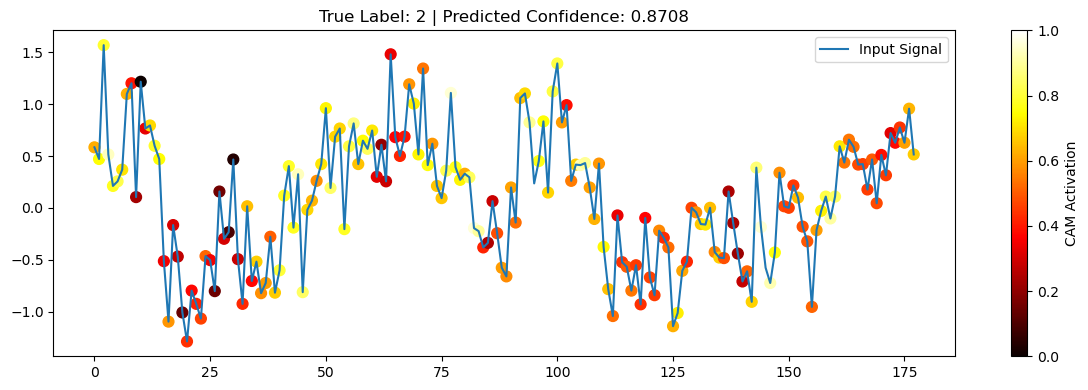

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


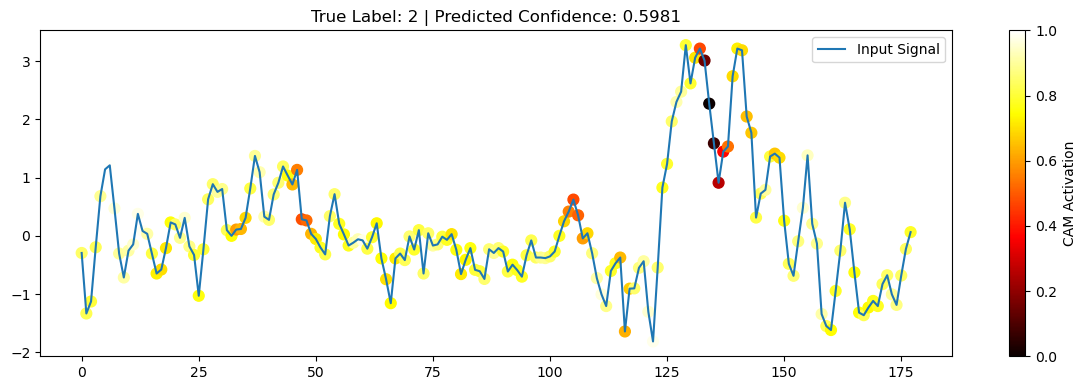

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


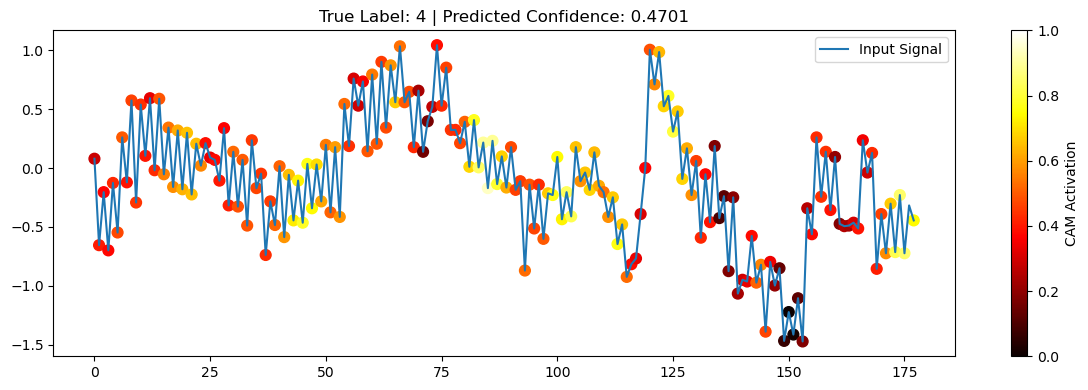

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


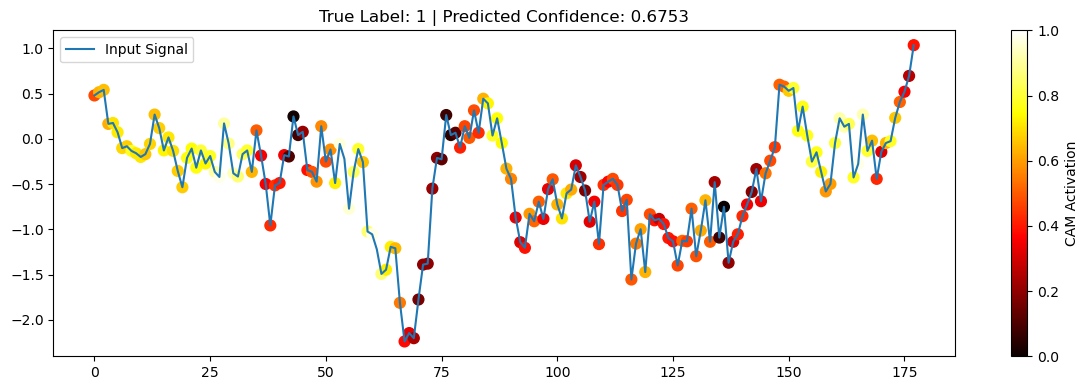

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


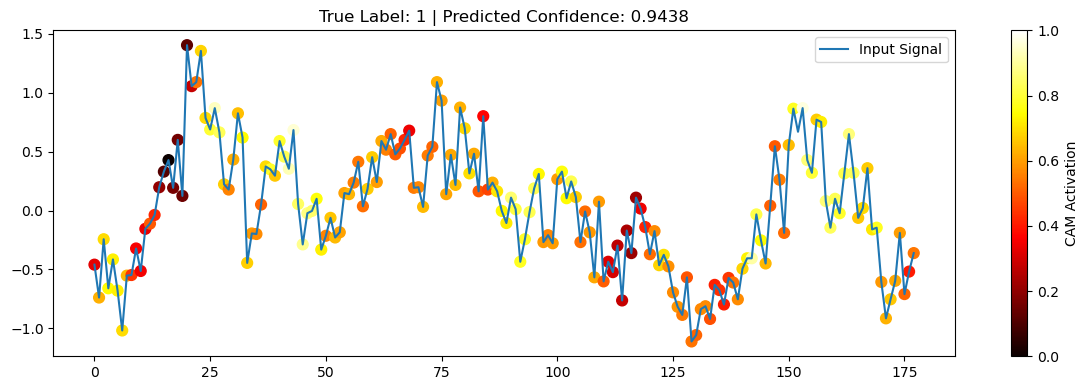

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


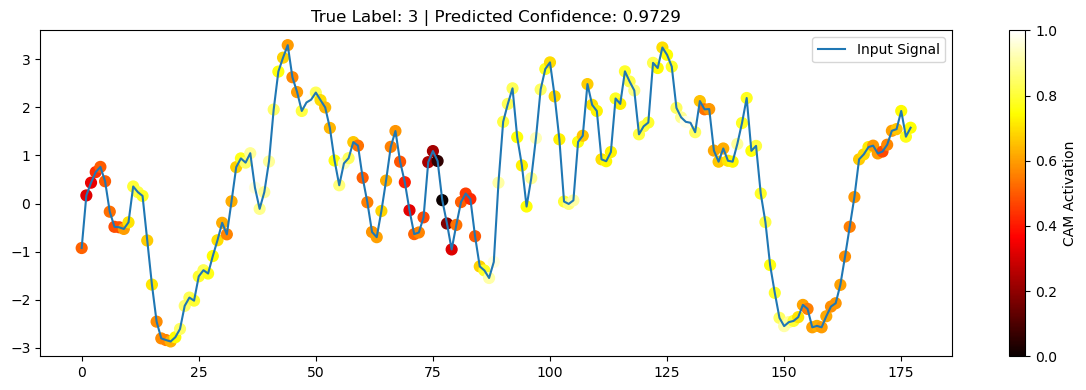

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


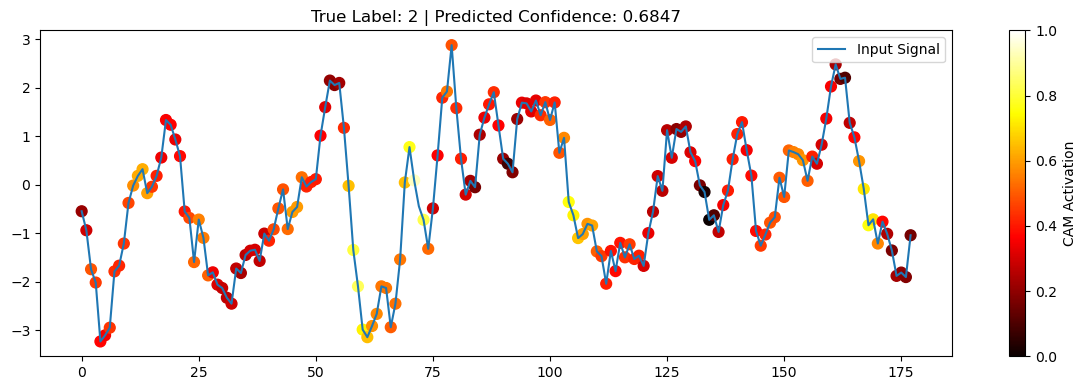

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


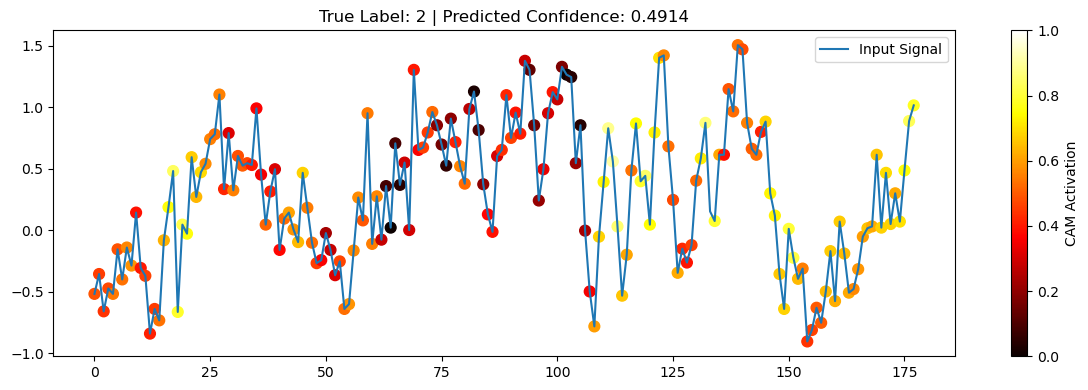

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


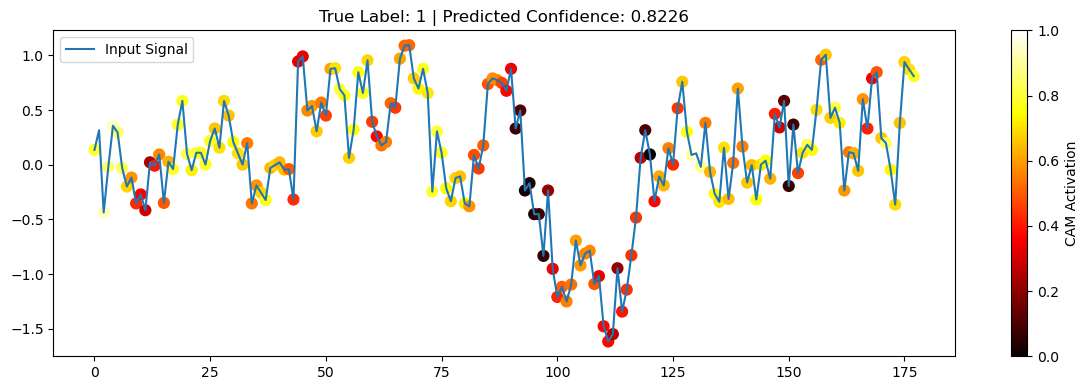

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


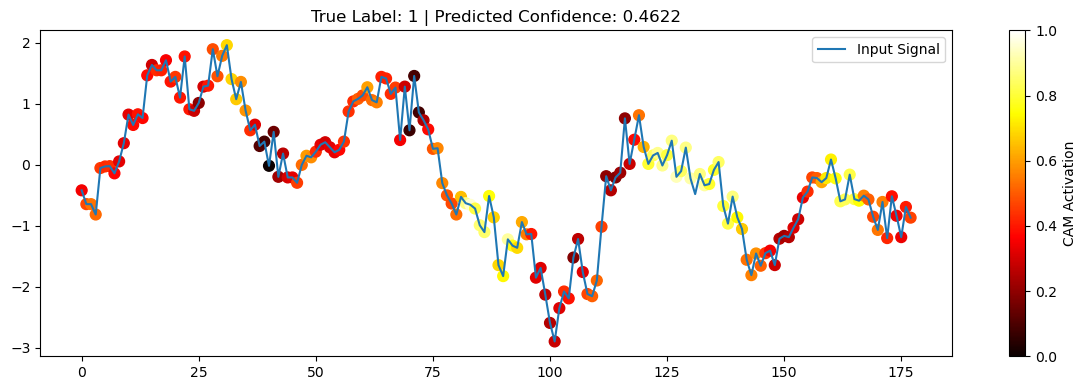

In [ ]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from tensorflow import keras
import tensorflow.keras.backend as K

# ---------------------- Data Utilities ----------------------

def read_and_pad_ucr(filename):
    """
    Reads UCR-style dataset (label in first column), replaces NaNs with 0.
    """
    data = np.loadtxt(filename, delimiter=',')
    y = data[:, 0]
    x_raw = data[:, 1:]
    x_cleaned = np.nan_to_num(x_raw, nan=0.0)
    return x_cleaned, y

def normalize_and_one_hot(x_train, x_val, x_test, y_train, y_val, y_test):
    """
    Normalizes feature data and one-hot encodes labels.
    """
    nb_classes = len(np.unique(y_train))

    # Normalize labels to integer class indices
    y_train_int = y_train.astype(int)
    y_val_int = y_val.astype(int)
    y_test_int = y_test.astype(int)

    # One-hot encode labels
    y_train_oh = keras.utils.to_categorical(y_train_int, nb_classes)
    y_val_oh = keras.utils.to_categorical(y_val_int, nb_classes)
    y_test_oh = keras.utils.to_categorical(y_test_int, nb_classes)

    # Standardize features
    mean, std = x_train.mean(), x_train.std()
    x_train = (x_train - mean) / std
    x_val = (x_val - mean) / std
    x_test = (x_test - mean) / std

    return x_train, x_val, x_test, y_train_int, y_val_int, y_test_int, y_train_oh, y_val_oh, y_test_oh, nb_classes

# ---------------------- Model Definition ----------------------

def build_model(input_shape, nb_classes):
    """
    Builds a simple Conv1D model with GlobalAveragePooling and softmax output.
    """
    inputs = keras.layers.Input(shape=input_shape)

    x = keras.layers.Conv1D(128, 8, padding='same')(inputs)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv1D(256, 5, padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv1D(128, 3, padding='same', name='last_conv')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.GlobalAveragePooling1D(name='gap')(x)
    outputs = keras.layers.Dense(nb_classes, activation='softmax')(x)

    model = keras.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# ---------------------- Training & Evaluation ----------------------

def train_model(model, x_train, y_train, x_val, y_val, batch_size, epochs=300):
    """
    Trains the model using early stopping and learning rate reduction.
    """
    callbacks = [
        keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20, min_lr=1e-4),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
    ]
    hist = model.fit(x_train, y_train, validation_data=(x_val, y_val),
                     batch_size=batch_size, epochs=epochs, callbacks=callbacks, verbose=1)
    log = pd.DataFrame(hist.history)
    best_idx = log['val_loss'].idxmin()
    print(f"Best Val Loss: {log['val_loss'].min():.4f} | Val Accuracy at Best Loss: {log.loc[best_idx, 'val_accuracy']:.4f}")
    return hist

# ---------------------- Class Activation Maps (CAM) ----------------------

def compute_cam(model, x_test, y_test_labels, n_samples=10):
    """
    Computes and visualizes CAM heatmaps for selected test samples.
    """
    conv_layer = model.get_layer('last_conv')
    gap_layer = model.get_layer('gap')
    class_weights = model.layers[-1].get_weights()[0]  # shape: (filters, classes)

    conv_output_model = keras.Model(model.input, conv_layer.output)

    for i in range(n_samples):
        conv_output = conv_output_model.predict(np.expand_dims(x_test[i], axis=0))[0]  # (time_steps, filters)
        weights = class_weights[:, y_test_labels[i]]  # weights for true class
        cam = np.dot(conv_output, weights)  # (time_steps,)

        cam = (cam - np.min(cam)) / (np.max(cam) - np.min(cam) + 1e-8)  # Normalize

        signal = x_test[i].squeeze()
        plt.figure(figsize=(12, 4))
        plt.plot(signal, label="Input Signal")
        plt.scatter(np.arange(len(signal)), signal, c=cam, cmap='hot', s=60)
        confidence = np.max(model.predict(x_test[i:i+1]))
        plt.title(f"True Label: {y_test_labels[i]} | Predicted Confidence: {confidence:.4f}")
        plt.colorbar(label='CAM Activation')
        plt.legend()
        plt.tight_layout()
        plt.show()

# ---------------------- Main ----------------------

if __name__ == "__main__":
    # Load and preprocess data
    x_all, y_all = read_and_pad_ucr("Sleep Train 5000.csv")

    # Split: 80% train, 10% val, 10% test
    x_train, x_temp, y_train, y_temp = train_test_split(x_all, y_all, test_size=0.3, stratify=y_all, random_state=42)
    x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

    # Normalize and encode
    x_train, x_val, x_test, y_train_int, y_val_int, y_test_int, y_train_oh, y_val_oh, y_test_oh, nb_classes = normalize_and_one_hot(
        x_train, x_val, x_test, y_train, y_val, y_test
    )

    # Reshape for Conv1D
    x_train = x_train[..., np.newaxis]
    x_val = x_val[..., np.newaxis]
    x_test = x_test[..., np.newaxis]

    # Build and train model
    model = build_model(input_shape=x_train.shape[1:], nb_classes=nb_classes)
    batch_size = min(len(x_train) // 10, 32)
    train_model(model, x_train, y_train_oh, x_val, y_val_oh, batch_size=batch_size)

    # Evaluate
    y_pred = model.predict(x_test)
    y_pred_labels = np.argmax(y_pred, axis=1)

    acc = accuracy_score(y_test_int, y_pred_labels)
    f1 = f1_score(y_test_int, y_pred_labels, average='weighted')
    print(f"\nTest Accuracy: {acc:.4f}")
    print(f"F1 Score (weighted): {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_test_int, y_pred_labels))
    print("Confusion Matrix:\n", confusion_matrix(y_test_int, y_pred_labels))

    # CAM Visualization
    compute_cam(model, x_test, y_test_int, n_samples=10)


### MLP

In [ ]:
from __future__ import print_function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
import os

# Set seed for reproducibility
np.random.seed(813306)

# ------------------ Data Reading and Preprocessing ------------------

def read_and_pad_ucr(filename: str):
    """Reads a UCR-style CSV file and replaces NaNs with 0.0."""
    data = np.loadtxt(filename, delimiter=',')
    y = data[:, 0]
    x_raw = data[:, 1:]
    x_cleaned = np.nan_to_num(x_raw, nan=0.0)
    return x_cleaned, y

def normalize_and_one_hot(x_train, x_val, x_test, y_train, y_val, y_test):
    nb_classes = len(np.unique(y_train))
    y_train_int = y_train.astype(int)
    y_val_int = y_val.astype(int)
    y_test_int = y_test.astype(int)

    y_train_oh = keras.utils.to_categorical(y_train_int, nb_classes)
    y_val_oh = keras.utils.to_categorical(y_val_int, nb_classes)
    y_test_oh = keras.utils.to_categorical(y_test_int, nb_classes)

    mean, std = x_train.mean(), x_train.std()
    x_train = (x_train - mean) / std
    x_val = (x_val - mean) / std
    x_test = (x_test - mean) / std

    return x_train, x_val, x_test, y_train_int, y_val_int, y_test_int, y_train_oh, y_val_oh, y_test_oh, nb_classes

# ------------------ Parameters ------------------

FILENAME = 'Sleep Train 5000.csv'
NB_EPOCHS = 300
os.makedirs("results", exist_ok=True)

# ------------------ Load and Prepare Data ------------------

x_all, y_all = read_and_pad_ucr(FILENAME)

# Stratified split: 80% train, 10% val, 10% test
x_train, x_temp, y_train, y_temp = train_test_split(x_all, y_all, test_size=0.3, stratify=y_all, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

x_train, x_val, x_test, y_train_int, y_val_int, y_test_int, y_train_oh, y_val_oh, y_test_oh, nb_classes = normalize_and_one_hot(
    x_train, x_val, x_test, y_train, y_val, y_test
)

input_shape = x_train.shape[1:]
batch_size = int(min(len(x_train) / 10, 16))

# ------------------ Model Definition ------------------

inputs = keras.layers.Input(shape=input_shape)
x = keras.layers.Dropout(0.1)(inputs)
x = keras.layers.Dense(500, activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(500, activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(500, activation='relu')(x)
x = keras.layers.Dropout(0.3)(x)
outputs = keras.layers.Dense(nb_classes, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=keras.optimizers.Adadelta(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=200, min_lr=0.1
)

# ------------------ Training ------------------

history = model.fit(
    x_train, y_train_oh,
    batch_size=batch_size,
    epochs=NB_EPOCHS,
    validation_data=(x_val, y_val_oh),
    callbacks=[reduce_lr],
    verbose=1
)

# ------------------ Evaluation ------------------

y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

acc = accuracy_score(y_test_int, y_pred_labels)
f1 = f1_score(y_test_int, y_pred_labels, average='weighted')

print("\n--- Test Set Evaluation ---")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_int, y_pred_labels, zero_division=0))  # <== suppress warning
print("Confusion Matrix:")
print(confusion_matrix(y_test_int, y_pred_labels))

# ------------------ Best Epoch Info ------------------

log = pd.DataFrame(history.history)
best_epoch = log['val_loss'].idxmin()
print(f"\nBest epoch #{best_epoch + 1}")
print(f"Train Loss: {log.loc[best_epoch, 'loss']:.4f} | "
      f"Validation Accuracy: {log.loc[best_epoch, 'val_accuracy']:.4f}")

# ------------------ Plot Training Curves ------------------

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(log['loss'], label='Train Loss')
plt.plot(log['val_loss'], label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(log['accuracy'], label='Train Accuracy')
plt.plot(log['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()

plt.tight_layout()
plt.savefig("results/training_curves.png")
plt.close()


Epoch 1/300
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.3085 - loss: 1.5914 - val_accuracy: 0.3613 - val_loss: 1.5227 - learning_rate: 0.0010
Epoch 2/300
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.3090 - loss: 1.5498 - val_accuracy: 0.3653 - val_loss: 1.5040 - learning_rate: 0.0010
Epoch 3/300
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.3304 - loss: 1.5377 - val_accuracy: 0.3667 - val_loss: 1.4899 - learning_rate: 0.0010
Epoch 4/300
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.3295 - loss: 1.5145 - val_accuracy: 0.3653 - val_loss: 1.4791 - learning_rate: 0.0010
Epoch 5/300
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.3213 - loss: 1.5235 - val_accuracy: 0.3600 - val_loss: 1.4709 - learning_rate: 0.0010
Epoch 6/300
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.3252 - loss: 1.5104 - val_accuracy: 0.3560 - val_loss: 1.4645 - learning_rate: 0.0010
Epoch 7/300
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3472 - l

### FCN

Epoch 1/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 21s 189ms/step - accuracy: 0.7135 - loss: 0.7199 - val_accuracy: 0.6947 - val_loss: 0.7633 - learning_rate: 0.0010
Epoch 17/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.7293 - loss: 0.6815 - val_accuracy: 0.6440 - val_loss: 0.8662 - learning_rate: 0.0010
Epoch 18/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.7169 - loss: 0.7025 - val_accuracy: 0.7080 - val_loss: 0.7239 - learning_rate: 0.0010
Epoch 19/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step - accuracy: 0.7166 - loss: 0.6914 - val_accuracy: 0.5773 - val_loss: 0.9924 - learning_rate: 0.0010
Epoch 20/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.7113 - loss: 0.6996 - val_accuracy: 0.7147 - val_loss: 0.7242 - learning_rate: 0.0010
Epoch 21/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.7322 - loss: 0.6626 - val_accuracy: 0.6320 - val_loss: 0.8934 - learning_rate: 0.0010
Epoch 22/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step - ac

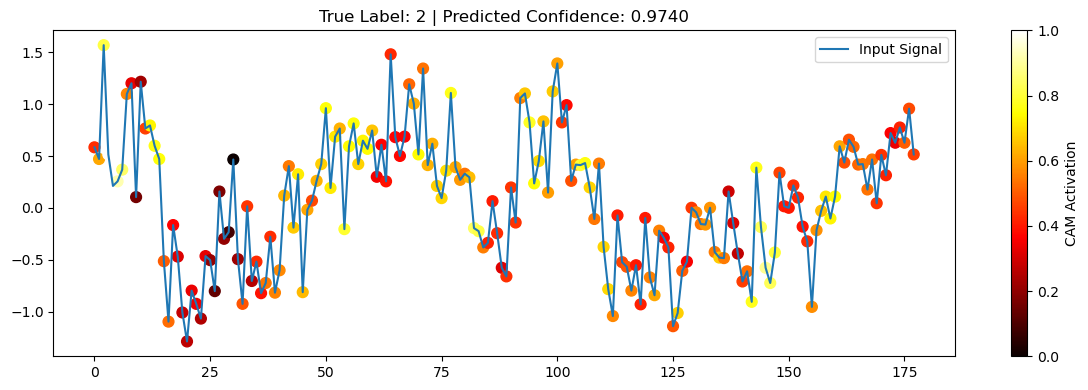

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


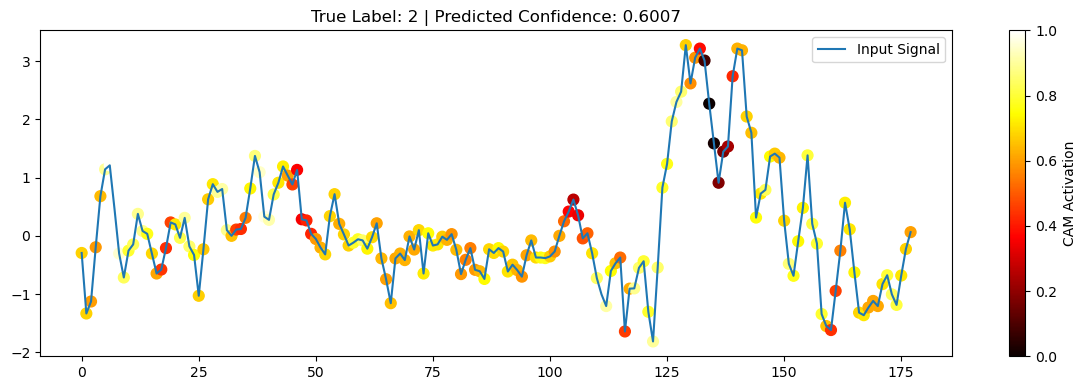

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


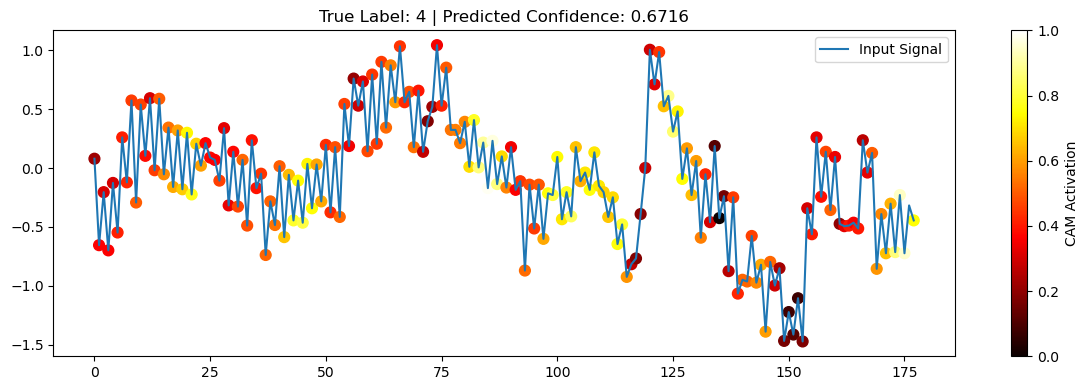

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


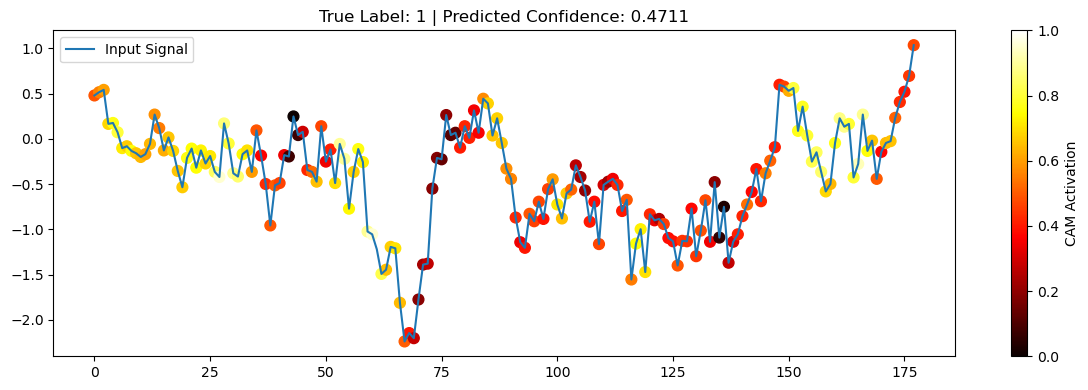

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


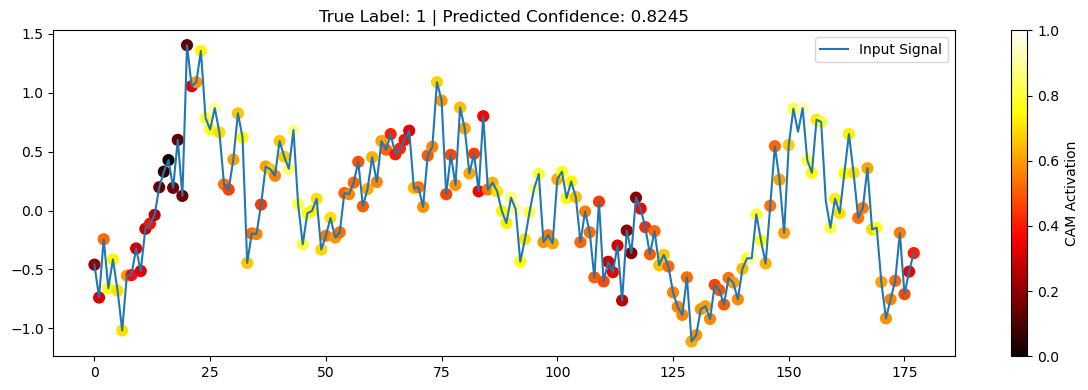

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


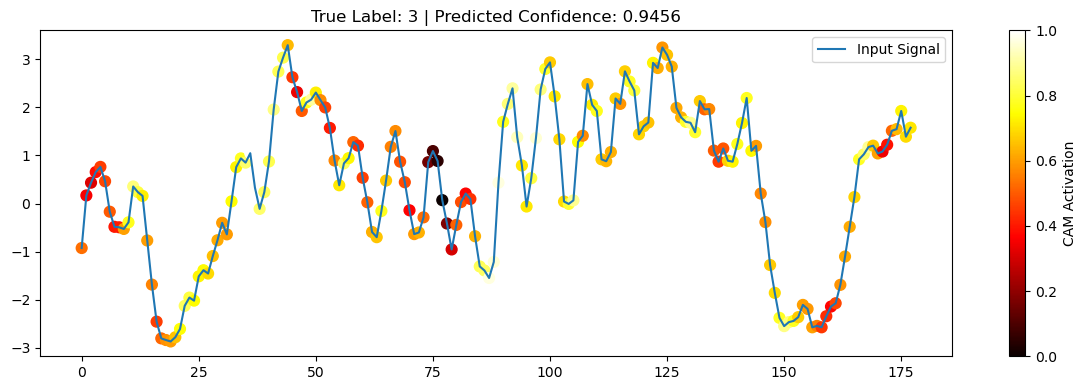

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


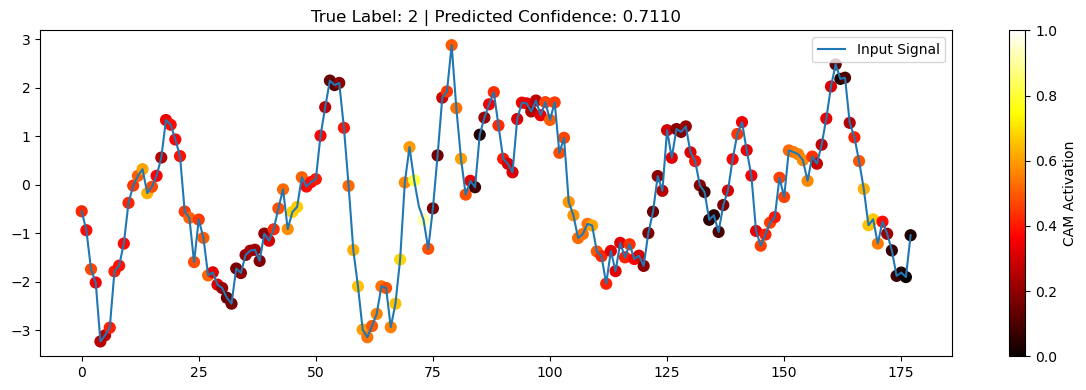

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


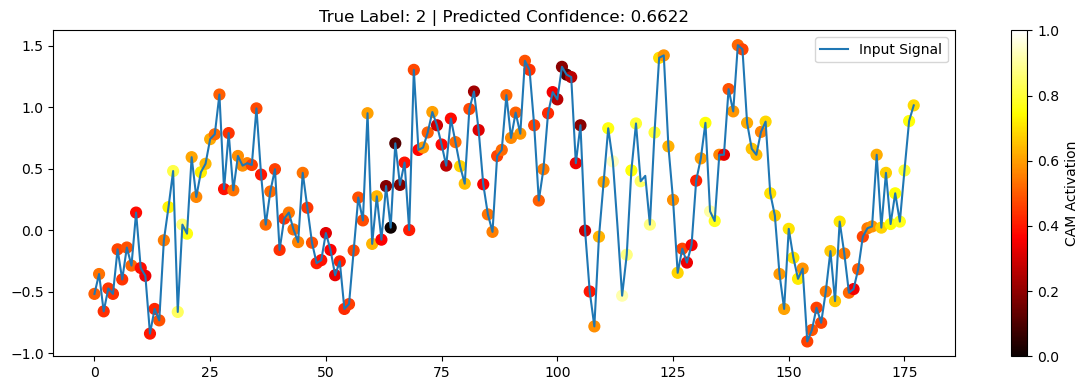

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


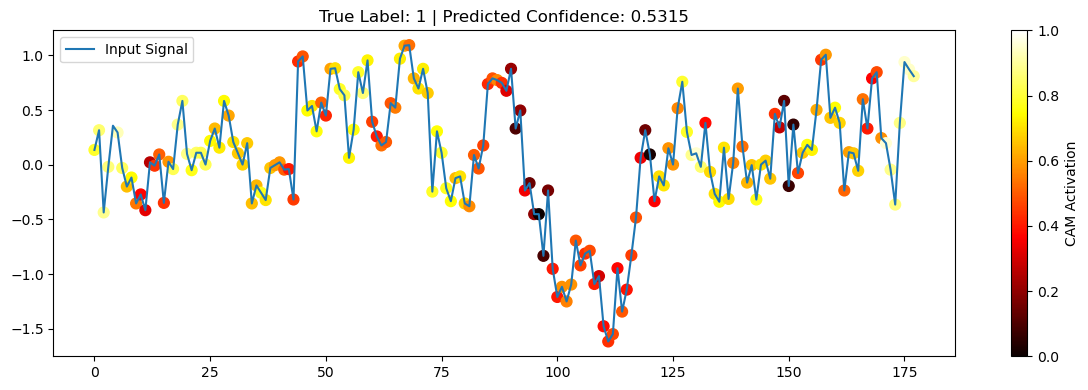

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


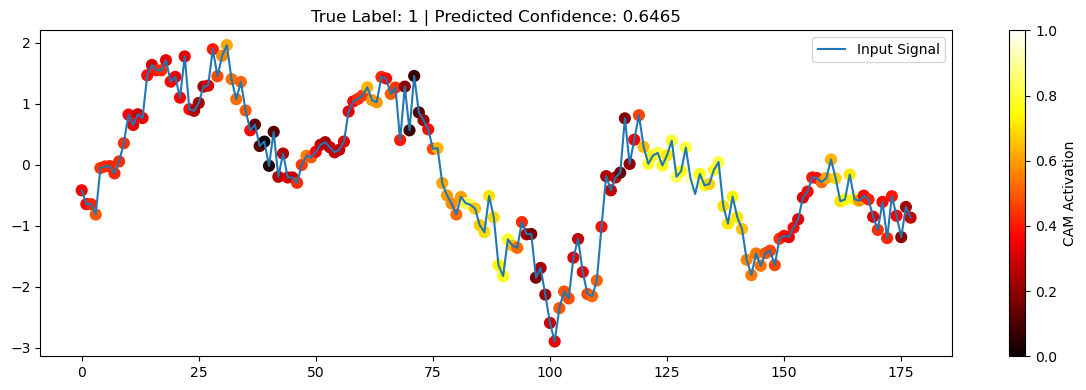

In [ ]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
import tensorflow.keras.backend as K

# ---------------------- Data Utilities ----------------------

def read_and_pad_ucr(filename):
    data = np.loadtxt(filename, delimiter=',')
    y = data[:, 0]
    x_raw = data[:, 1:]

    # Replace NaNs with 0 (safe fallback) instead of padding
    x_cleaned = np.nan_to_num(x_raw, nan=0.0)
    return x_cleaned, y

def normalize_and_one_hot(x_train, x_val, x_test, y_train, y_val, y_test):
    nb_classes = len(np.unique(y_train))

    # Normalize labels to 0..nb_classes-1
    y_train_norm = y_train.astype(int)
    y_val_norm = y_val.astype(int)
    y_test_norm = y_test.astype(int)

    # One-hot encode
    y_train_oh = keras.utils.to_categorical(y_train_norm, nb_classes)
    y_val_oh = keras.utils.to_categorical(y_val_norm, nb_classes)
    y_test_oh = keras.utils.to_categorical(y_test_norm, nb_classes)

    # Normalize features
    mean, std = x_train.mean(), x_train.std()
    x_train = (x_train - mean) / std
    x_val = (x_val - mean) / std
    x_test = (x_test - mean) / std

    return x_train, x_val, x_test, y_train_norm, y_val_norm, y_test_norm, y_train_oh, y_val_oh, y_test_oh, nb_classes

# ---------------------- Model Definition ----------------------

def build_model(input_shape, nb_classes):
    inputs = keras.layers.Input(shape=input_shape)

    x = keras.layers.Conv1D(128, 8, padding='same', activation=None)(inputs)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv1D(256, 5, padding='same', activation=None)(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv1D(128, 3, padding='same', activation=None, name='last_conv')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.GlobalAveragePooling1D(name='gap')(x)
    outputs = keras.layers.Dense(nb_classes, activation='softmax')(x)

    model = keras.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# ---------------------- Training & Evaluation ----------------------

def train_model(model, x_train, y_train, x_val, y_val, batch_size, epochs=300):
    reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20, min_lr=1e-4)
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
    hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                     validation_data=(x_val, y_val), callbacks=[reduce_lr, early_stop], verbose=1)
    log = pd.DataFrame(hist.history)
    print("Best Val Loss:", log['val_loss'].min(), "| Val Accuracy at Best Loss:", log.loc[log['val_loss'].idxmin(), 'val_accuracy'])
    return hist

# ---------------------- Class Activation Maps (CAM) ----------------------

def compute_cam(model, x_test, y_test, y_test_labels, n_samples=20):
    conv_layer = model.get_layer('last_conv')
    gap_layer = model.get_layer('gap')
    class_weights = model.layers[-1].get_weights()[0]  # shape (features, classes)

    conv_output_model = keras.Model(model.input, conv_layer.output)

    for i in range(n_samples):
        conv_output = conv_output_model.predict(np.expand_dims(x_test[i], axis=0))[0]  # shape: (time_steps, filters)
        weights = class_weights[:, y_test_labels[i]]  # shape: (filters,)
        cam = np.dot(conv_output, weights)

        cam = (cam - np.min(cam)) / (np.max(cam) - np.min(cam) + 1e-8)

        plt.figure(figsize=(12, 4))
        signal = x_test[i].squeeze()
        plt.plot(signal, label="Input Signal")
        plt.scatter(np.arange(len(signal)), signal, c=cam, cmap='hot', s=60)
        plt.title(f"True Label: {y_test_labels[i]} | Predicted Confidence: {np.max(model.predict(x_test[i:i+1])):.4f}")
        plt.colorbar(label='CAM Activation')
        plt.legend()
        plt.tight_layout()
        plt.show()

# ---------------------- Main Execution ----------------------

if __name__ == "__main__":
    # Load and preprocess data
    x_all, y_all = read_and_pad_ucr("Sleep Train 5000.csv")

    # Split the data: 80% train, 10% validation, 10% test
    x_train, x_temp, y_train, y_temp = train_test_split(x_all, y_all, test_size=0.3, stratify=y_all, random_state=42)
    x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

    # Normalize and one-hot
    x_train, x_val, x_test, y_train_int, y_val_int, y_test_int, y_train_oh, y_val_oh, y_test_oh, nb_classes = normalize_and_one_hot(
        x_train, x_val, x_test, y_train, y_val, y_test
    )

    # Reshape for Conv1D: (samples, timesteps, features)
    x_train = x_train[..., np.newaxis]
    x_val = x_val[..., np.newaxis]
    x_test = x_test[..., np.newaxis]

    # Build and train model
    model = build_model(x_train.shape[1:], nb_classes)
    batch_size = min(len(x_train) // 10, 32)
    train_model(model, x_train, y_train_oh, x_val, y_val_oh, batch_size)

    # Evaluation
    y_pred = model.predict(x_test)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true = y_test_int

    acc = accuracy_score(y_true, y_pred_labels)
    f1 = f1_score(y_true, y_pred_labels, average='weighted')

    print(f"\nAccuracy: {acc:.4f}")
    print(f"F1 Score (weighted): {f1:.4f}\n")
    print("Classification Report:")
    print(classification_report(y_true, y_pred_labels))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred_labels))

    # CAM Visualization
    compute_cam(model, x_test, y_test, y_test_int, n_samples=10)


### **Model Performance Analysis**

Among the three models, **ResNet performed the best**, achieving **72.4% accuracy** and a **weighted F1-score of 0.73**. It showed strong performance across all classes, especially class 3 (F1: 0.87) and class 2 (F1: 0.72), though there was some confusion with classes 1 and 4.

**FCN was close behind**, with **72.1% accuracy** and an **F1-score of 0.72**. It handled classes 2 and 3 well but struggled more with classes 1 and 4.

**MLP lagged significantly**, reaching only **47.7% accuracy** and failing to identify classes 0, 1, and 4 — heavily favoring class 2 in its predictions.

Overall, **CNN-based models (ResNet and FCN) clearly outperform MLP**, especially in capturing temporal patterns in the data.


## MiniRocket

## Overview

This approach addresses sleep cycles classification using a kernel-based method designed for high-speed and high-accuracy time series classification: **MiniRocket**. The method offers an alternative to manual feature engineering by automatically generating a fixed-size representation of each time series using random convolutional kernels. The core idea is to extract signal dynamics in a way that retains the temporal characteristics crucial for EEG-based sleep analysis.

---

## 1. Data Preparation and Preprocessing

To make the raw EEG time series data suitable for classification:

- **Train/Validation Splitting**: The dataset was split into training and validation sets to enable generalization assessment and model selection.
- **Normalization**: A `StandardScaler` was applied to ensure consistent data distribution across samples and reduce the impact of outliers or amplitude shifts.
- **Balancing Classes**: Sleep data as found in EDA is imbalanced. Thus **SMOTE** was used post-splitting to synthetically augment the minority classes and improve learning fairness across all labels.

---

## 2. Conversion for sktime Compatibility

MiniRocket expects input data in a nested `pandas.DataFrame` format, where each row represents a sample and each cell contains the entire univariate time series. Thus, the 2D NumPy arrays were reshaped into this format, enabling seamless integration with the `sktime` toolkit.

---

## 3. Feature Extraction via MiniRocket

The central component of this pipeline is **MiniRocket**, which transforms each signal into a high-dimensional vector of convolutional features:

- Operates by applying thousands of fixed, random kernels.
- Captures local and global time-domain characteristics.
- Offers rapid computation even on large datasets.
- Avoids the need for explicit signal decomposition (e.g., Fourier or wavelet transforms).

This step effectively replaces manual feature engineering with a data-driven, automated representation that preserves key temporal signatures.

---

## 4. Classifier Selection and Optimization

Several classifiers were trained on the MiniRocket-transformed feature vectors:

- **LightGBM**: Gradient-boosted decision trees offering strong performance on tabular data.
- **Random Forest**: Ensemble of decision trees with built-in resistance to overfitting.
- **Ridge Classifier**: Linear model with L2 regularization, efficient for high-dimensional feature spaces.
- **Logistic Regression**

Hyperparameter optimization was conducted using `RandomizedSearchCV` with stratified 5-fold cross-validation, ensuring reliable model selection while preserving label proportions across folds.

---

## 5. Performance Evaluation

To assess the models’ effectiveness across multiple dimensions:

- **Accuracy** was calculated for general correctness.
- **ROC AUC** evaluated class separability.
- **K-S Statistic** was used as a secondary check for distributional differences in predictions.
- **Precision, Recall, and F1-Score** were reviewed per class using detailed classification reports.

---

## Rationale Behind the Pipeline

This strategy was selected to balance performance and efficiency on time series classification without the computational burden of deep learning and before trying handcrafted feature extraction. MiniRocket enables fast, structured transformation of EEG signals into a machine-learnable format, suitable for scalable experimentation. Combined with robust classical classifiers, this pipeline achieves strong results with interpretability and minimal preprocessing overhead.

In [ ]:
!pip install sktime #Handle time series classification, regression, forecasting

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.0/37.0 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 13.6 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.0
    Uninstalling joblib-1.5.0:
      Successfully uninstalled joblib-1.5.0


Reloading necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.linear_model import RidgeClassifierCV, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, roc_curve, auc
from sktime.transformations.panel.rocket import MiniRocket
from sktime.datatypes._panel._convert import from_2d_array_to_nested
from scipy.stats import ks_2samp
from sklearn.preprocessing import StandardScaler, label_binarize
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from itertools import cycle

#### LightGBM and Logistic Regression

Applying PCA to reduce MiniRocket output to 400 features...

Model: LogisticRegression
Best Parameters: {'C': 0.5, 'max_iter': 500, 'solver': 'newton-cg'}
Accuracy: 0.6960
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.68      0.64       102
           1       0.51      0.56      0.53       140
           2       0.75      0.66      0.71       400
           3       0.77      0.86      0.81       208
           4       0.70      0.70      0.70       150

    accuracy                           0.70      1000
   macro avg       0.67      0.69      0.68      1000
weighted avg       0.70      0.70      0.70      1000



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046518 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 102000
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 400
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Model: LightGBM
Best Parameters: {'num_leaves': 40, 'n_estimators': 200, 'learning_rate': 0.1}
Accuracy: 0.6740
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.65      0.62       102
           1       0.57      0.44      0.49       140
           2       0.68      0.69      0.69       400
           3       0.75      0.84      0.79       208
           4       0.66      0.63      0.64       150

    accuracy                           0.67      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.67      0.67      0.67      1000



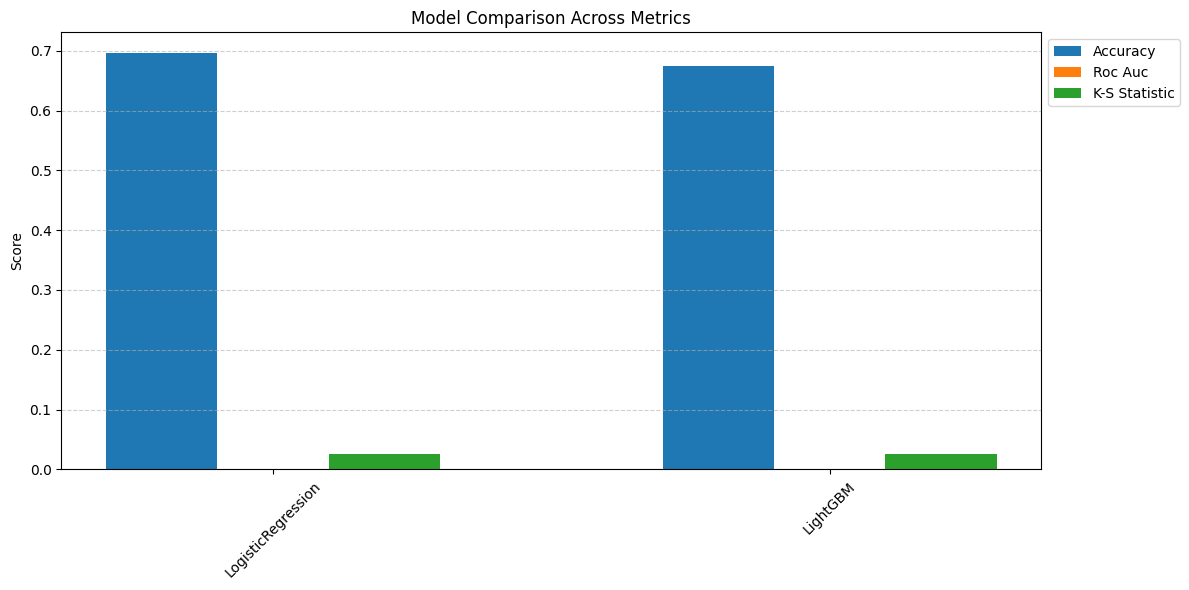

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


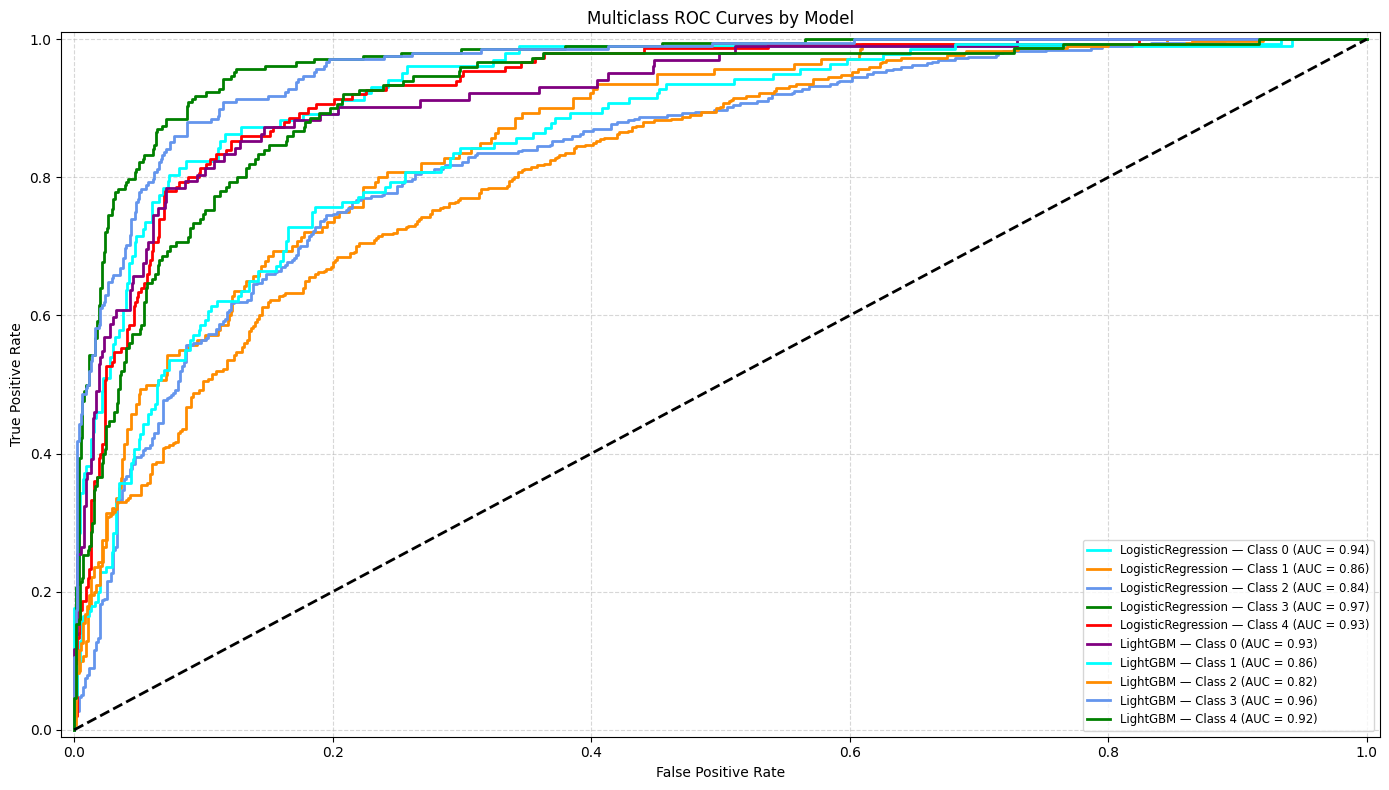

In [ ]:
# ============================ LOAD DATA ============================
train_df = pd.read_csv('Sleep Train 5000.csv')
test_df = pd.read_csv('Sleep Test 1000.csv')

y_train = train_df.iloc[:, 0].values
X_train = train_df.iloc[:, 1:].values
X_test = test_df.values

# Split & scale
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

scaler = StandardScaler()
X_train_split = scaler.fit_transform(X_train_split)
X_val_split = scaler.transform(X_val_split)
X_test = scaler.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_split, y_train_split = smote.fit_resample(X_train_split, y_train_split)

# Convert to nested format
X_train_nested = from_2d_array_to_nested(X_train_split)
X_val_nested = from_2d_array_to_nested(X_val_split)
X_test_nested = from_2d_array_to_nested(X_test)

# ============================ MODEL CLASS ============================
class ModelTester:
    def __init__(self, X_train, y_train, X_val, y_val):
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        self.models = {}
        self.minirocket = None

    def initialize_minirocket(self, use_pca=False, pca_components=300):
        self.minirocket = MiniRocket()
        self.minirocket.fit(self.X_train)
        X_train_transformed = self.minirocket.transform(self.X_train)
        X_val_transformed = self.minirocket.transform(self.X_val)

        if use_pca:
            print(f"Applying PCA to reduce MiniRocket output to {pca_components} features...")
            self.pca = PCA(n_components=pca_components)
            self.X_train_transformed = self.pca.fit_transform(X_train_transformed)
            self.X_val_transformed = self.pca.transform(X_val_transformed)
        else:
            self.X_train_transformed = X_train_transformed
            self.X_val_transformed = X_val_transformed

    def test_model(self, model, param_grid, model_name, search_type='grid'):
        if isinstance(model, RidgeClassifierCV):
            model.fit(self.X_train_transformed, self.y_train)
            y_pred = model.predict(self.X_val_transformed)
            best_model = model
            best_params = "Built-in CV"
        else:
            if search_type == 'grid':
                search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
            elif search_type == 'random':
                search = RandomizedSearchCV(model, param_grid, cv=5, n_iter=10, scoring='accuracy', n_jobs=-1)
            search.fit(self.X_train_transformed, self.y_train)
            best_model = search.best_estimator_
            y_pred = best_model.predict(self.X_val_transformed)
            best_params = search.best_params_

        accuracy = accuracy_score(self.y_val, y_pred)
        try:
            roc_auc = roc_auc_score(self.y_val, y_pred, multi_class='ovr')
        except:
            roc_auc = None

        ks_statistic, _ = ks_2samp(self.y_val, y_pred)

        print(f"\nModel: {model_name}")
        print(f"Best Parameters: {best_params}")
        print(f"Accuracy: {accuracy:.4f}")
        print("Classification Report:")
        print(classification_report(self.y_val, y_pred))

        self.models[model_name] = {
            'accuracy': accuracy,
            'roc_auc': roc_auc if roc_auc is not None else 0,
            'K-S statistic': ks_statistic,
            'model': best_model
        }

    def plot_model_metrics_detailed(self, class_labels=None):
        models = list(self.models.keys())
        metrics = ['accuracy', 'roc_auc', 'K-S statistic']
        data = {metric: [] for metric in metrics}

        for model in models:
            model_data = self.models[model]
            for metric in metrics:
                data[metric].append(model_data[metric])

        x = np.arange(len(models))
        width = 0.2

        fig, ax = plt.subplots(figsize=(12, 6))
        for i, metric in enumerate(metrics):
            ax.bar(x + i * width, data[metric], width, label=metric.replace('_', ' ').title())

        ax.set_xticks(x + width)
        ax.set_xticklabels(models, rotation=45)
        ax.set_ylabel('Score')
        ax.set_title('Model Comparison Across Metrics')
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        ax.grid(True, axis='y', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()

    def plot_model_roc_curves(self):
        n_classes = len(np.unique(self.y_val))
        y_val_bin = label_binarize(self.y_val, classes=np.unique(self.y_val))
        colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])

        plt.figure(figsize=(14, 8))

        for model_name, model_data in self.models.items():
            model = model_data['model']
            if not hasattr(model, "predict_proba"):
                print(f"Skipping ROC for {model_name} (no predict_proba())")
                continue

            y_score = model.predict_proba(self.X_val_transformed)

            for i, color in zip(range(n_classes), colors):
                fpr, tpr, _ = roc_curve(y_val_bin[:, i], y_score[:, i])
                roc_auc = auc(fpr, tpr)
                plt.plot(fpr, tpr, color=color, lw=2,
                         label=f'{model_name} — Class {i} (AUC = {roc_auc:.2f})')

        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([-0.01, 1.01])
        plt.ylim([-0.01, 1.01])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Multiclass ROC Curves by Model')
        plt.legend(loc='lower right', fontsize='small')
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

    def predict_test(self, X_test_nested, model_name, save_csv=True, file_name='sleep_predictions_mini_rocket.csv'):
        if not self.minirocket:
            raise ValueError("MiniRocket not initialized. Call initialize_minirocket() first.")

        X_test_transformed = self.minirocket.transform(X_test_nested)
        if hasattr(self, 'pca'):
            X_test_transformed = self.pca.transform(X_test_transformed)

        model = self.models[model_name]['model']
        predictions = model.predict(X_test_transformed)

        if save_csv:
            pd.DataFrame({'Predicted': predictions}).to_csv(file_name, index=False)
            print(f"Predictions saved to {file_name}")

        return predictions

# ============================ HYPERPARAMETERS ============================
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

param_grid_lgb = {
    'n_estimators': [150, 200, 250],
    'num_leaves': [20, 31, 40],
    'learning_rate': [0.05, 0.1]
}


param_grid_lr = {
    'C': [0.25, 0.5, 0.75, 1.0],
    'solver': ['lbfgs', 'newton-cg'],
    'max_iter': [500, 1000]
}

# ============================ TRAIN MODELS ============================
model_tester = ModelTester(X_train_nested, y_train_split, X_val_nested, y_val_split)
model_tester.initialize_minirocket(use_pca=True, pca_components=400)

#model_tester.test_model(RandomForestClassifier(), param_grid_rf, 'RandomForest', search_type='random')
model_tester.test_model(LogisticRegression(class_weight='balanced'), param_grid_lr, 'LogisticRegression', search_type='grid')

# ============================ PREDICT TEST ============================
test_predictions = model_tester.predict_test(X_test_nested, model_name='LogisticRegression')

#model_tester.test_model(LGBMClassifier(), param_grid_lgb, 'LightGBM', search_type='random')

model_tester.plot_model_metrics_detailed()
model_tester.plot_model_roc_curves()

- PCA helps reduce feature space from huge MiniRocket output while preserving 95% of the variance(400 components)

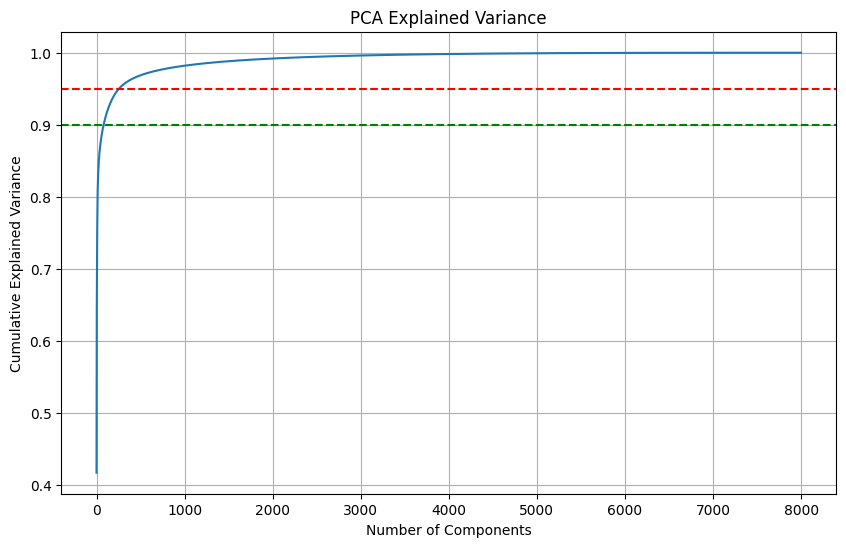

In [ ]:
# Fit PCA on MiniRocket-transformed training set
X_train_transformed = model_tester.minirocket.transform(X_train_nested)
pca = PCA().fit(X_train_transformed)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--')  # mark 95% variance
plt.axhline(y=0.90, color='g', linestyle='--')  # mark 90% variance
plt.show()

#### Xgboost

Applying PCA to reduce MiniRocket output to 400 features...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:03:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Accuracy: 0.6710
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.66      0.63       102
           1       0.54      0.43      0.48       140
           2       0.68      0.69      0.69       400
           3       0.73      0.86      0.79       208
           4       0.69      0.60      0.64       150

    accuracy                           0.67      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.67      0.67      0.67      1000



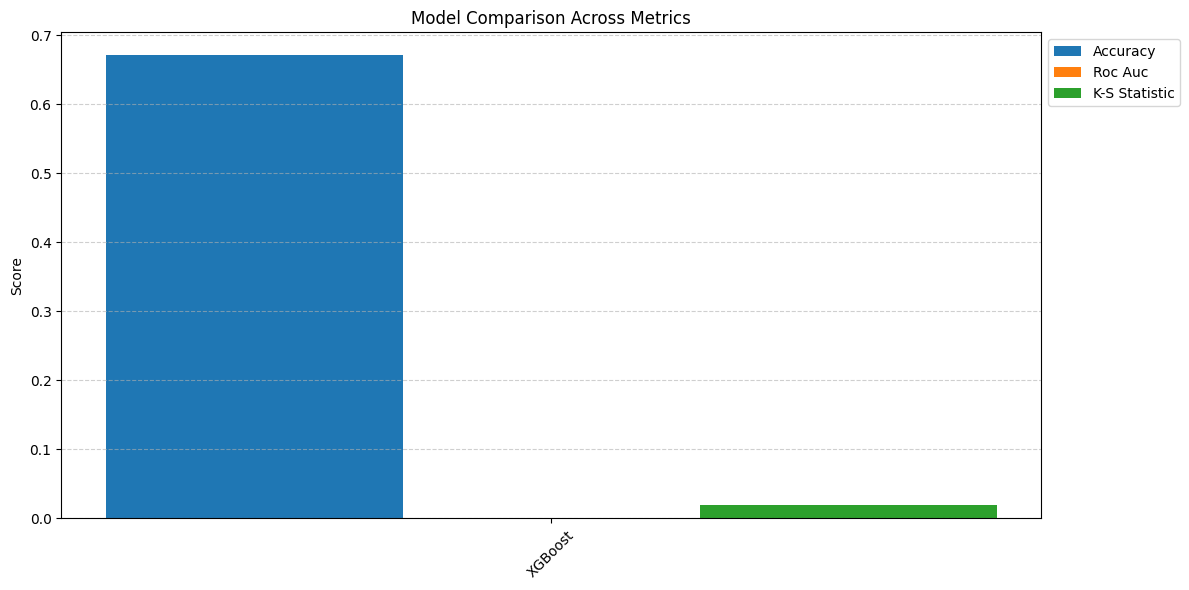

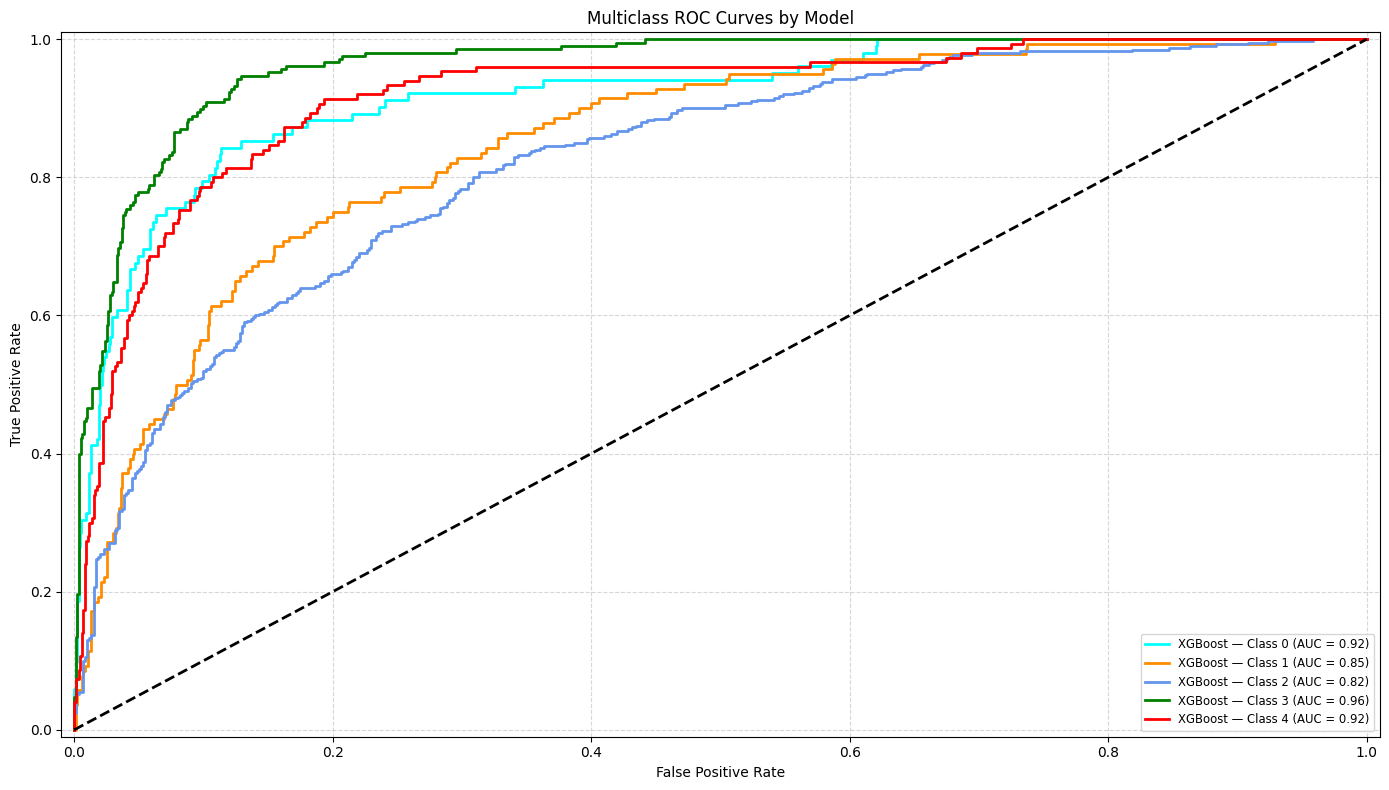

In [ ]:
from itertools import cycle
from xgboost import XGBClassifier
param_grid_xgb = {
    'n_estimators': [200],
    'max_depth': [5],
    'learning_rate': [0.2],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}
# ============================ TRAIN MODELS ============================
model_tester = ModelTester(X_train_nested, y_train_split, X_val_nested, y_val_split)
model_tester.initialize_minirocket(use_pca=True, pca_components=400)

model_tester.test_model(
    XGBClassifier(objective='multi:softprob', use_label_encoder=False, eval_metric='mlogloss'),
    param_grid_xgb,
    'XGBoost',
    search_type='random'
)
model_tester.plot_model_metrics_detailed()
model_tester.plot_model_roc_curves()

#### Model Performance Analysis



- Logistic Regression is stronger here with accuracy 69.6%, most likely due to PCA linearly compressing informative features.

- Stage 1 classification is consistently hard for all models, while 2 and 3 are easier to classify.


## Approach X (Best Accuracy)

## **Overview**
Given the nature of the *data—high-dimensional* time series representing brain activity—special care was taken in feature extraction, data preprocessing, and classifier selection to effectively capture *temporal patterns* and physiological *variance* across sleep stages.

---

## **1. Data Interpretability & Feature Engineering**

Each sample consists of a single-channel EEG time series. To convert these raw signals into a structured format suitable for machine learning models, a handcrafted feature extraction strategy was adopted. Features were designed to reflect *statistical*, *frequency-based*, and *temporal characteristics* of the EEG waveform:

- **Statistical descriptors**: Mean, standard deviation, interquartile range, skewness, and kurtosis to reflect *distributional properties*.
- **Frequency-domain features**: Derived using the Fast Fourier Transform (FFT), to capture frequency energy variations between stages.
- **Signal dynamics**: Features like zero crossings, slope, absolute mean change, and autocorrelation were computed to describe trends and rhythmicity.
- **Energy and entropy**: Used to reflect the signal's power and complexity.
- **Rolling statistics**: Mean and standard deviation over short temporal windows (2, 5, and 10) to model local signal smoothness or bursts.
- **Optional DTW-based features**: Dynamic Time Warping distances from KMeans cluster centroids were computed to represent temporal similarity, although they were disabled in the final configuration due to dataset size and overfitting concerns.

This feature set was chosen to balance physiological relevance and model interpretability while remaining efficient to compute at scale.

---

## **2. Preprocessing**

- **Standardization**: All features were scaled to zero mean and unit variance to ensure *equal contribution* across features.
- **PCA**: Principal Component Analysis was optionally applied (retaining 95–98% variance) to *reduce noise* and multicollinearity, and to accelerate training.
- **Label Encoding**: Categorical sleep stage labels were converted into numeric form to enable model training.

---

## **3. Handling Class Imbalance**

Sleep datasets typically suffer from class imbalance. To address this, **SMOTE** was applied after feature extraction and before model training. This method synthetically generates samples for minority classes, improving class representation and classifier robustness.

---

## **4. Model Selection and Training Strategy**

A **Stacking Ensemble Classifier** was chosen as the final model due to its ability to combine the strengths of several base models:

- **Base learners**:
  - Random Forest
  - Gradient Boosting
  - XGBoost (with hyperparameter tuning)
- **Meta-learner**: Logistic Regression

A **RandomizedSearchCV** strategy was used for hyperparameter tuning, optimizing accuracy across a **Stratified 5-Fold Cross-Validation** to maintain class proportions. This ensemble was selected for its high performance on tabular, engineered features and its robustness to noise and overfitting.

---

## **Why This Approach Was Chosen**

- EEG signals are inherently non-stationary and noisy, making **deep models unsuitable without significant preprocessing or large data volumes**. Hence, traditional ML combined with rich, interpretable feature extraction was deemed more effective.
- The handcrafted features were informed by known physiological patterns in sleep stages, such as frequency shifts and amplitude variability. This allowed the model to learn meaningful patterns directly tied to sleep science.
- A stacking ensemble combines diversity and depth across models while mitigating individual model biases. This approach typically improves generalization on complex classification tasks.
- SMOTE was used to address the imbalanced distribution across sleep classes found in the EDA phase

---



In [ ]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from tslearn.metrics import dtw
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans
import warnings
warnings.filterwarnings('ignore')
from joblib import Parallel, delayed, dump, load
from sklearn.utils import check_random_state
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier

class TimeSeriesClassifier:
    def __init__(self, enable_dtw=False, n_jobs=-1, random_state=42):
        self.scaler = StandardScaler()
        self.label_encoder = LabelEncoder()
        self.model = None
        self.best_model = None
        self.pca = None
        self.feature_names = None
        self.enable_dtw = enable_dtw
        self.n_jobs = n_jobs
        self.random_state = check_random_state(random_state)

    def load_data(self, file_path):
        df = pd.read_csv(file_path, header=None)
        y = df.iloc[:, 0].values
        X = df.iloc[:, 1:].values
        return X, y

    def _extract_features_one(self, ts):
        mean = np.mean(ts)
        std = np.std(ts)
        minimum = np.min(ts)
        maximum = np.max(ts)
        median = np.median(ts)
        q25 = np.percentile(ts, 25)
        q75 = np.percentile(ts, 75)
        iqr = q75 - q25
        skew = 0 if std == 0 else ((mean - median) / std)
        kurtosis = np.mean((ts - mean)**4) / (std**4) if std > 0 else 0

        fft_vals = np.abs(np.fft.fft(ts))
        fft_mean = np.mean(fft_vals)
        fft_std = np.std(fft_vals)
        fft_max = np.max(fft_vals)

        diff = np.diff(ts)
        zero_crossings = np.sum(np.diff(np.signbit(diff)))
        mean_abs_change = np.mean(np.abs(diff))
        acf_1 = np.corrcoef(ts[:-1], ts[1:])[0, 1] if len(ts) > 1 else 0

        time_index = np.arange(len(ts))
        slope = np.polyfit(time_index, ts, 1)[0] if len(ts) > 1 else 0

        peaks = np.sum(np.diff(np.diff(ts) > 0))
        energy = np.sum(ts**2)
        hist, _ = np.histogram(ts, bins=20)
        hist = hist / np.sum(hist)
        entropy = -np.sum(hist * np.log2(hist + 1e-10))
        above_mean = np.sum(ts > mean) / len(ts)

        feature_vector = [
            mean, std, minimum, maximum, median, q25, q75, iqr, skew, kurtosis,
            fft_mean, fft_std, fft_max, zero_crossings, mean_abs_change,
            acf_1, slope, peaks, energy, entropy, above_mean
        ]

        for window in [2, 5, 10]:
            if len(ts) >= window:
                rm = pd.Series(ts).rolling(window=window).mean().dropna().values
                feature_vector.append(np.mean(rm))
                feature_vector.append(np.std(rm))
            else:
                feature_vector.extend([0, 0])

        return feature_vector

    def extract_features(self, X):
        features = Parallel(n_jobs=self.n_jobs)(
            delayed(self._extract_features_one)(ts) for ts in X
        )

        if not self.feature_names:
            self.feature_names = [
                'mean', 'std', 'min', 'max', 'median', 'q25', 'q75', 'iqr', 'skew', 'kurtosis',
                'fft_mean', 'fft_std', 'fft_max', 'zero_crossings', 'mean_abs_change',
                'acf_1', 'slope', 'peaks', 'energy', 'entropy', 'above_mean',
                'rolling_mean_2', 'rolling_std_2', 'rolling_mean_5', 'rolling_std_5',
                'rolling_mean_10', 'rolling_std_10'
            ]

        return np.array(features)

    def add_dynamic_time_warping_features(self, X, n_clusters=3):
        try:
            X_ts = to_time_series_dataset(X)
            X_scaled = TimeSeriesScalerMeanVariance().fit_transform(X_ts)
            kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", random_state=self.random_state)
            kmeans.fit(X_scaled)

            distances = Parallel(n_jobs=self.n_jobs)(
                delayed(lambda ts: [dtw(ts, centroid) for centroid in kmeans.cluster_centers_])(ts)
                for ts in X_scaled
            )
            return np.array(distances)
        except Exception as e:
            print(f"DTW error: {e}")
            return np.zeros((X.shape[0], n_clusters))

    def prepare_data(self, X, y=None, use_pca=True, n_pca_components=0.95):
        X_features = self.extract_features(X)

        if self.enable_dtw and X.shape[0] < 1000:
            dtw_features = self.add_dynamic_time_warping_features(X)
            X_features = np.hstack((X_features, dtw_features))
            if self.feature_names:
                self.feature_names.extend([f'dtw_{i}' for i in range(dtw_features.shape[1])])

        if y is not None:
            X_scaled = self.scaler.fit_transform(X_features)
            if use_pca:
                self.pca = PCA(n_components=n_pca_components, random_state=self.random_state)
                X_scaled = self.pca.fit_transform(X_scaled)
            y_encoded = self.label_encoder.fit_transform(y)
            return X_scaled, y_encoded
        else:
            X_scaled = self.scaler.transform(X_features)
            if use_pca and self.pca is not None:
                X_scaled = self.pca.transform(X_scaled)
            return X_scaled

    def train(self, X, y, visualize=True):
        print(f"Training on {X.shape[0]} samples")
        X_prepared, y_encoded = self.prepare_data(X, y, use_pca=True, n_pca_components=0.98)

        smote = SMOTE(random_state=self.random_state)
        X_prepared, y_encoded = smote.fit_resample(X_prepared, y_encoded)

        X_train, X_test, y_train, y_test = train_test_split(
            X_prepared, y_encoded, test_size=0.2, random_state=self.random_state, stratify=y_encoded)

        rf = RandomForestClassifier(random_state=self.random_state)
        gb = GradientBoostingClassifier(random_state=self.random_state)
        xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=self.random_state)

        param_grid = {
            'xgbclassifier__n_estimators': [100, 200],
            'xgbclassifier__max_depth': [3, 5, 7],
            'xgbclassifier__learning_rate': [0.05, 0.1, 0.2],
        }

        estimators = [
            ('rf', rf),
            ('gb', gb),
            ('xgbclassifier', xgb),
        ]
        stack_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), n_jobs=self.n_jobs)

        search = RandomizedSearchCV(
            stack_model,
            param_distributions=param_grid,
            n_iter=10,
            scoring='accuracy',
            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=self.random_state),
            n_jobs=self.n_jobs,
            verbose=1,
            random_state=self.random_state
        )

        search.fit(X_train, y_train)

        y_pred = search.predict(X_test)
        print("Best Params:", search.best_params_)
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))

        self.model = search.best_estimator_
        self.model.fit(X_prepared, y_encoded)

        # Save everything
        dump(self.model, "best_model.joblib")
        dump(self.scaler, "scaler.joblib")
        dump(self.label_encoder, "label_encoder.joblib")
        dump(self.pca, "pca.joblib")

    def predict(self, X):
        if self.model is None:
            raise ValueError("Model not trained.")
        X_prepared = self.prepare_data(X)
        return self.label_encoder.inverse_transform(self.model.predict(X_prepared))

    def predict_proba(self, X):
        if self.model is None or not hasattr(self.model, 'predict_proba'):
            raise ValueError("Model not trained or no proba support.")
        X_prepared = self.prepare_data(X)
        return self.model.predict_proba(X_prepared), self.label_encoder.classes_



clf = TimeSeriesClassifier(enable_dtw=True, n_jobs=-1)

# === Training ===
X, y = clf.load_data("Sleep Train 5000.csv")
clf.train(X, y)

# === Inference on test data ===
test_df = pd.read_csv("Sleep Test 1000.csv", header=None)
X_test = test_df.values
predictions = clf.predict(X_test)

# === Save predictions ===
pd.DataFrame(predictions).to_csv("test_predictions_stacked.csv", index=False, header=False)


Training on 4999 samples
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Params: {'xgbclassifier__n_estimators': 100, 'xgbclassifier__max_depth': 7, 'xgbclassifier__learning_rate': 0.2}
Accuracy: 0.8125
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       400
           1       0.84      0.82      0.83       400
           2       0.65      0.56      0.61       400
           3       0.81      0.90      0.85       400
           4       0.85      0.86      0.85       400

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000

Confusion Matrix:
[[368   9  13   2   8]
 [ 12 330  38  10  10]
 [ 18  41 226  72  43]
 [  3   1  38 358   0]
 [  9  14  32   2 343]]


### **Model Performance Analysis**

The stacked ensemble classifier achieved 81.25% accuracy using XGBoost (100 estimators, max depth 7, learning rate 0.2). Class 0 demonstrated excellent performance (precision 0.90, recall 0.92), while classes 1, 3, and 4 showed strong results with F1-scores ranging from 0.83-0.85.

Class 2 remains challenging (F1-score 0.61), frequently being misclassified as class 1, suggesting pattern similarity between these categories. The ensemble approach combining feature engineering, SMOTE for handling imbalance, and stacked classifiers effectively captures complex temporal relationships in the data.

---

## Conclusion


### Final Comparison Summary

| **Approach**              | **Feature Engineering**         | **Model Type**                     | **Accuracy** |
| ------------------------- | ------------------------------- | ---------------------------------- | ------------ |
| **Stacked Ensemble**      | Handcrafted (FFT, stats, DTW\*) | Stacking (RF, GB, XGB + LR)        | **81.25%**   |
| ResNet                    | Raw signal input                | Deep CNN (ResNet)                  | 72.4%        |
| FCN                       | Raw signal input                | Deep CNN (FCN)                     | 72.1%        |
| MiniRocket (Baseline)  | MiniRocket Kernels              | Logistic Regression(Classical ML) |69.6%  |
| MiniRocket    | MiniRocket Kernels              | Gradient Boosted Trees (LightGBM)  |   67.4%        |
| LSTM                      | Minimal preprocessing           | Deep Learning (RNN)                | 59.4%        |
| MLP                       | Raw signal input                | Shallow Neural Network (MLP)       | 47.7%        |


---
Each modeling method provided unique strength and trade-off for classification work for **EEG-Sleep** Stage. The results suggest that the combination of thoughtful feature engineering and stacked machine learning models is the better appraoch, especially in settings with limited data(5000 in train). Below is a summary of our findings:

- The best-performing model, the `Stacked Ensemble` using handcrafted features (FFT, statistical, DTW), achieved 81.25% accuracy, confirming the value of domain-informed preprocessing and ensemble learning.

- Deep learning models such as ResNet  and FCN, which directly use raw EEG signals, reached about 72% accuracy. These models may require larger datasets or more training epochs to surpass feature-engineered pipelines.

- MiniRocket + Logistic Regression achieved 69.6%, validating that automated feature extraction followed by dimensionality reduction and classical ML is a viable and efficient baseline.

- LSTM improved notably to 59.4%, suggesting that RNNs benefit from minimal but targeted preprocessing. Still, they remain below CNN-based approaches in this setup.

- MLP remains the weakest at 47.7%, likely due to its shallow structure and limited ability to capture temporal dynamics or signal complexity.



## Final Prediction

For the final submission, we use the predictions generated by the best-performing approach, the stacked ensemble model. Each row in the prediction file corresponds to the predicted class label of a test instance, listed in the same order as in the test dataset.

You can find the final predictions here: [Predictions](https://docs.google.com/spreadsheets/d/1TCfNxVkIxpw2hC-V0YreBUVIQNYJJn9PZ_XDEZEzzBs/edit?usp=sharing)

In [ ]:
final_predictions = pd.read_csv("test_predictions_stacked.csv", header=None)
print(np.unique(final_predictions, return_counts=True))

(array([0, 1, 2, 3, 4]), array([213, 437, 254,  66,  30]))


### References

- https://medium.com/the-forecaster/the-complete-introduction-to-time-series-classification-in-python-6af967b16dc9

- https://github.com/angus924/minirocket

- https://link.springer.com/article/10.1007/s42979-023-02159-4